<font color="dodgerblue">
    
# Lead Scoring Case Study
</font>

<font color="dodgerblue">
    
Developing Logistic Regression Model to assign Lead Score between 0 (Lead is cold) to 100 (Lead is hot)
</font>

<font color="dodgerblue">
    
### Libraries
</font>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

<font color="dodgerblue">
    
### Read Data

</font>

In [2]:
df = pd.read_csv("Leads.csv")

In [3]:
df.shape

(9240, 37)

In [4]:
pd.set_option('display.max_columns', 40)

In [5]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
## duplicated entries
sum(df.duplicated())

0

In [9]:
## null check
(df.isnull().sum()*100/len(df)).sort_values(ascending=False).head(18)

Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

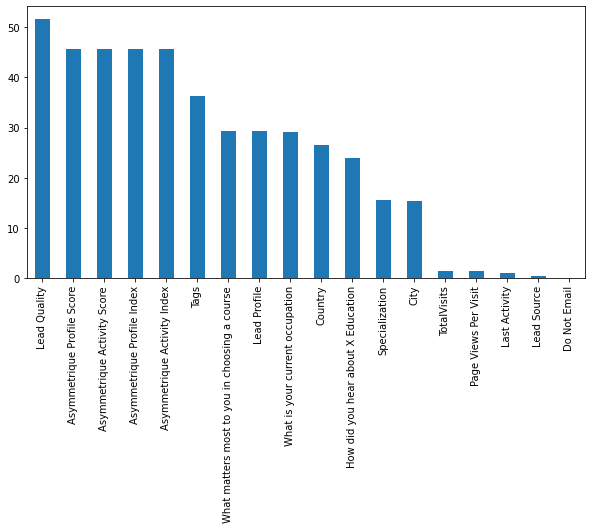

In [10]:
plt.figure(figsize=[10,5])
(df.isnull().sum()*100/len(df)).sort_values(ascending=False).head(18).plot.bar()
plt.show()

<font color="dodgerblue">
    
**Removing the columns which has high percentage of null values**
</font>

In [11]:
df.drop(['Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index', 
         'Asymmetrique Activity Index'], axis=1, inplace=True)

<font color="dodgerblue">
    
### Analyzing the column in missing values order
### column: Tags (36.28% null value)

</font>

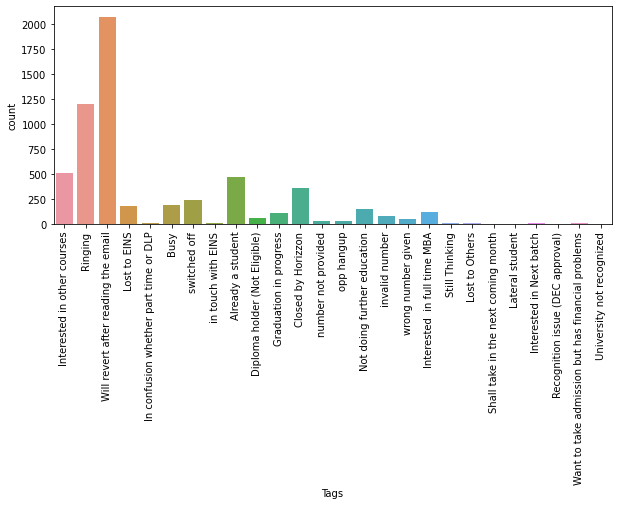

In [12]:
plt.figure(figsize=[10,4])
plt.xticks(rotation=90)
sns.countplot(df.Tags)
plt.show()

#### Data Imputation
**The below column values are not giving proper tag details. All these below categories can be group to unanswered**
1. Ringing
2. switched off
3. wrong number given
4. number not provided
5. Busy
6. invalid number
7. opp hangup

In [13]:
df.Tags.replace(["Ringing","switched off","wrong number given","number not provided","Busy","invalid number","opp hangup"],"unanswered", inplace=True)

In [14]:
df.Tags.value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
unanswered                                           30.898590
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
Diploma holder (Not Eligible)                         1.070155
in touch with EINS                                    0.203839
Lost to Others                                        0.118906
Still Thinking                                        0.101919
Want to take admission but has financial problems     0.101919
Interested in Next batch                              0.084933
In confusion whether part time or DLP                 0

   
**Tags: It has 36.287879% of null values and 30% of unanswered values. <br/>
considering the fact that not sufficient information is held in this column which will help for scope analysis, removing this column from dataset**

In [15]:
df.drop(['Tags'], axis=1, inplace=True)

<font color="dodgerblue">
    
### column: What matters most to you in choosing a course (29.32% null value)
</font>

In [16]:
df['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

 **Data Imputation: "Better Career Prospects" is the best option to impute the null values**

In [17]:
df["What matters most to you in choosing a course"].replace(np.nan,"Better Career Prospects", inplace=True)

In [18]:
# Updating the column name to readable
df["Course_Reasoning"] = df['What matters most to you in choosing a course']

In [19]:
df.drop('What matters most to you in choosing a course', axis=1, inplace=True)

<font color="dodgerblue">
    
### column: Lead Profile  (29.32% of null data)
</font>

In [20]:
df["Lead Profile"].value_counts(normalize=True)

Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: Lead Profile, dtype: float64

**"Select" is nothing but no option is selected for the Lead profile. Hence imputing "Select" as null values**

In [21]:
df["Lead Profile"].replace("Select",np.nan, inplace=True)
df["Lead Profile"].isnull().sum()*100/len(df)

74.18831168831169

 **Lead Profile: 74% of the data is not provided for the column, "Lead Profile". Since, the column doesn't hold sufficient data required for analysis removing it from dataset**

In [22]:
df.drop("Lead Profile", axis=1, inplace=True)

<font color="dodgerblue">
    
### column: What is your current occupation (29.11% of null value) </font>

In [23]:
df["What is your current occupation"].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

**The null values in the column, "What is your current occupation" can be imputed to the best match value "Unemployed"**

In [24]:
df["What is your current occupation"].replace(np.nan,"Unemployed", inplace=True)
df["What is your current occupation"].value_counts(normalize=True)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [25]:
## updating the column name to readable
df["Occupation"] = df["What is your current occupation"]
df.drop("What is your current occupation", axis=1, inplace=True)

<font color="dodgerblue">
    
### column: How did you hear about X Education (23.89% of null value)
</font>

In [26]:
df["How did you hear about X Education"].value_counts(normalize=True)*100

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64

**71% of the data is not selected for this column: "How did you hear about X Education". Also this can be any other option.
The scope of assignment is determining Lead score for the leads in order to help the sales team.
Since this column has not the sufficient data required for analysis droppping this column from dataset**

In [27]:
df.drop("How did you hear about X Education", axis=1, inplace=True)

<font color="dodgerblue">
    
### column: Specialization (15.56% of null value)
</font>

In [28]:
df["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

**"Select" means no category is selected for the specialization. Imputing the "Select" and null values to unknown**

In [29]:
df["Specialization"].replace("Select","Unknown", inplace=True)
df["Specialization"].replace(np.nan,"Unknown", inplace=True)

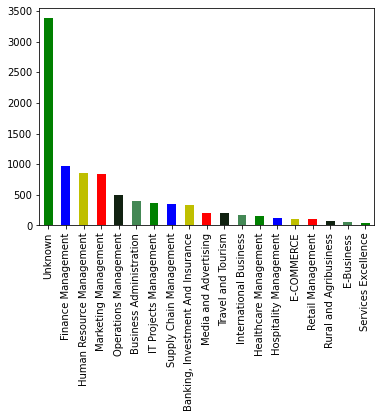

In [30]:
colors=["g","b","y","r","#112211","#448855"]
df["Specialization"].value_counts().plot.bar(color=colors)
plt.show()

<font color="dodgerblue">
    
### column: City, (15.37% of null value), column: Country, (26.63% of null value)

***Handling both columns for Data understanding***
</font>

In [31]:
df.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [32]:
df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Nigeria                    4
South Africa               4
Canada                     4
Germany                    4
Sweden                     3
Philippines                2
Ghana                      2
Asia/Pacific Region        2
Italy                      2
Uganda                     2
Netherlands                2
China                      2
Belgium                    2
Bangladesh                 2
Indonesia                  1
Malaysia                   1
Vietnam                    1
Switzerland                1
Liberia                    1
Denmark                    1
Kenya         

<font color="royalblue">
    
#### There is a big confusion with the City and Country provided for each leads. <br/>
#### Both of these columns will be fixed as per the below Data Imputation

***Updating City***
1. If Country is India and Cities are in "Thane & Outskirts", "Other Cities of Maharastra" --> update to "City_In_Maharashtra" <br/>

2. If Country is India and Cities are in "Select", "Other Cities", "Other Metro Cities","Tier II Cities", "Other Cities of Maharastra" --> update to "City_In_India" (considering the city can be of any location inside India) <br/>

3. If City is null but the Country is "India" --> update to "City_In_India"  <br/>

4. If City is null or "Select" but the Country is NOT "India" --> update to "Others"  <br/>

5. If City is null and Country is NOT "India" --> This is highly confused situation to either update City or Country. Marking this as "Unknown" City

***Updating Country***

5. If Country is null but the City is "Mumbai" --> update to "India"  <br/>

6. If Country is null but the City is "Others" --> update to "Other_Countries"  <br/>
</font>

In [33]:
df.loc[(df['City'].isin (["Thane & Outskirts", "Other Cities of Maharashtra"])) & (df['Country'] == 'India'), 'City']= 'City_In_Maharashtra'
df.loc[(df['City'].isin (["Select","Other Cities", "Other Metro Cities","Tier II Cities"])) & (df['Country'] == 'India'), 'City'] = 'City_In_India'


In [34]:
df["City"].replace(("Other Cities of Maharashtra", "Select", "Thane & Outskirts"),"Other Cities", inplace=True)

In [35]:
df.loc[(df['City'].isnull()) & (df['Country'] == 'India'), 'City'] = 'City_In_India'
df.loc[(df['City'].isnull()) & (df['Country'] != 'India'), 'City'] = 'Unknown'
df.loc[(df['Country'].isnull()) & (df['City'] == 'Mumbai'), 'Country'] = 'India'
df.loc[(df['Country'].isnull()) & (df['City'] == 'Others'), 'Country'] = 'Other_Countries'
df.loc[(df['City'] == "Mumbai") & (df['Country'] != 'India'), 'City'] = 'Unknown'

In [36]:
df["Country"].replace(np.nan, "Unknown", inplace=True)

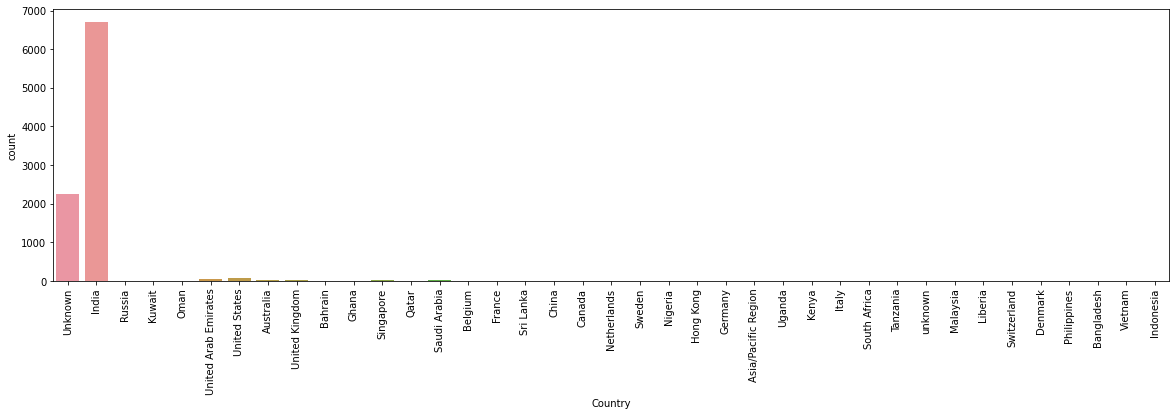

In [37]:
plt.figure(figsize=[20,5])
sns.countplot(df.Country)
plt.xticks(rotation=90)
plt.show()

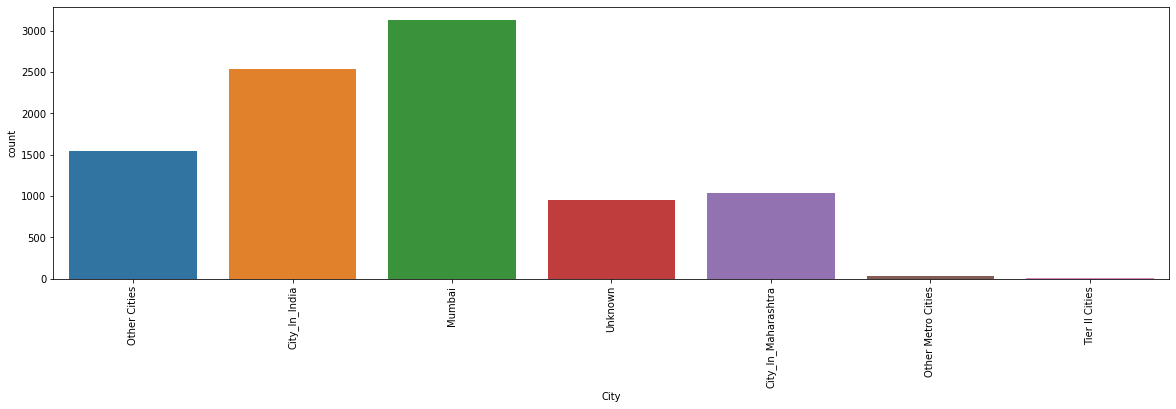

In [38]:
plt.figure(figsize=[20,5])
sns.countplot(df.City)
plt.xticks(rotation=90)
plt.show()

<font color="dodgerblue">

### column: Lead Score

In [39]:
df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
testone                 1
welearnblog_Home        1
NC_EDM                  1
blog                    1
WeLearn                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [40]:
### Data Cleaning
df["Lead Source"].replace("google", "Google", inplace=True)

All these below categories can be group to "Others" since the counts are very less<br/>
bing,Click2call,Live Chat,Social Media,Press_Release,WeLearn,youtubechannel,welearnblog_Home,Pay per Click Ads,testone,NC_EDM,blog

In [41]:
#Category - grouping
df["Lead Source"].replace(["bing","Click2call","Live Chat","Social Media","Press_Release","WeLearn","youtubechannel","welearnblog_Home","Pay per Click Ads","testone","NC_EDM","blog"], "Others", inplace=True)

<font color="dodgerblue">
    
### Revalidating Null Check

In [42]:
(df.isnull().sum()*100/len(df)).sort_values(ascending=False).head(5)

TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
Lead Source             0.389610
Occupation              0.000000
dtype: float64

<font color="dodgerblue">
    
### Dropping the rows with lesser Null Values

In [43]:
df.dropna(inplace=True)

In [44]:
(df.isnull().sum()*100/len(df)==0).value_counts()

True    29
dtype: int64

<font color="tomato">
    
## Exploratory Data Analysis

Univariate Analysis

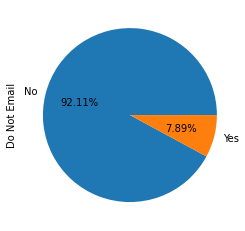

In [45]:
df["Do Not Email"].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

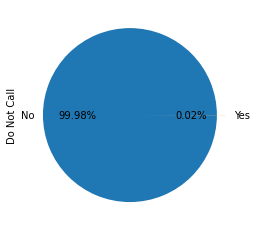

In [46]:
df["Do Not Call"].value_counts().plot.pie(explode=(0,0.1), autopct='%1.2f%%')
plt.show()

In [47]:
df["TimeSpentOnWebsite"]=df["Total Time Spent on Website"]

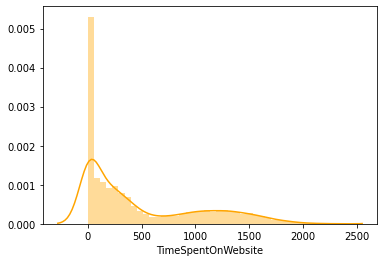

In [48]:
df.drop("Total Time Spent on Website", axis=1, inplace=True)
sns.distplot(df["TimeSpentOnWebsite"], hist=True, label="Time Spent on Website", kde=True, bins=40, color="Orange")
plt.show()

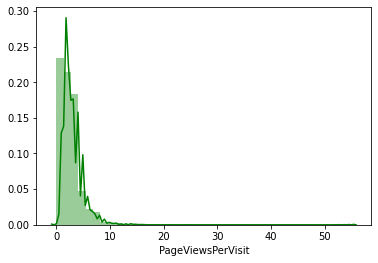

In [49]:
df["PageViewsPerVisit"]=df["Page Views Per Visit"]
df.drop("Page Views Per Visit", axis=1, inplace=True)
sns.distplot(df["PageViewsPerVisit"], hist=True, kde=True, label="Page viewed/visit", bins=40, color="Green")
plt.show()

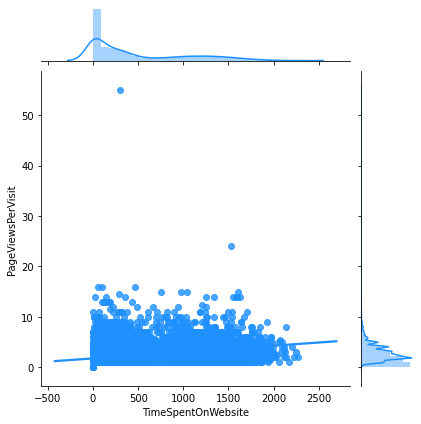

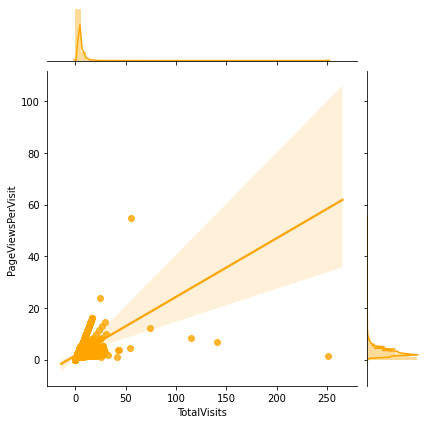

In [50]:
sns.jointplot(x=df["TimeSpentOnWebsite"], y=df["PageViewsPerVisit"],color="dodgerblue", kind="reg")
sns.jointplot(x=df["TotalVisits"], y=df["PageViewsPerVisit"],color="Orange", kind="reg")
plt.show()

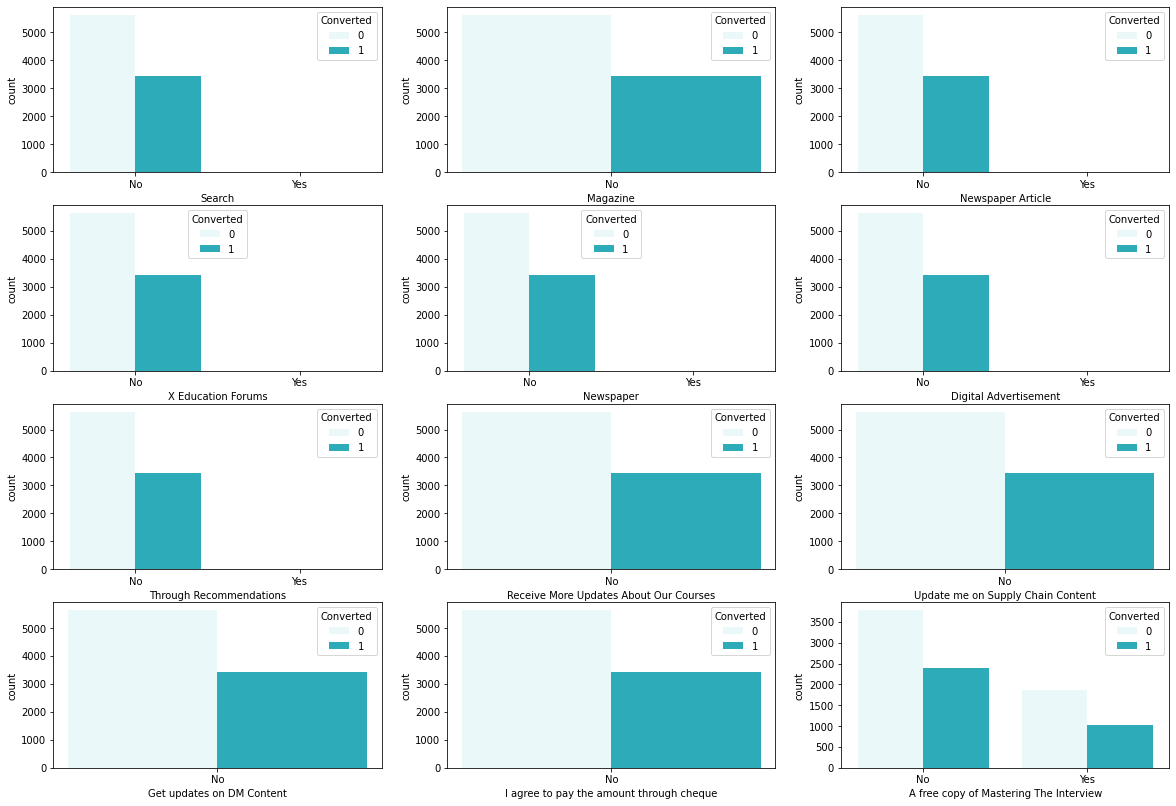

In [51]:
plt.figure(figsize=[20,14])
col = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums','Newspaper', 'Digital Advertisement',
 'Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
 'Get updates on DM Content','I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

for i in enumerate(col):
    plt.subplot(4,3,i[0]+1)
    sns.countplot(x=df[i[1]], hue="Converted", data=df,color="tab:cyan")


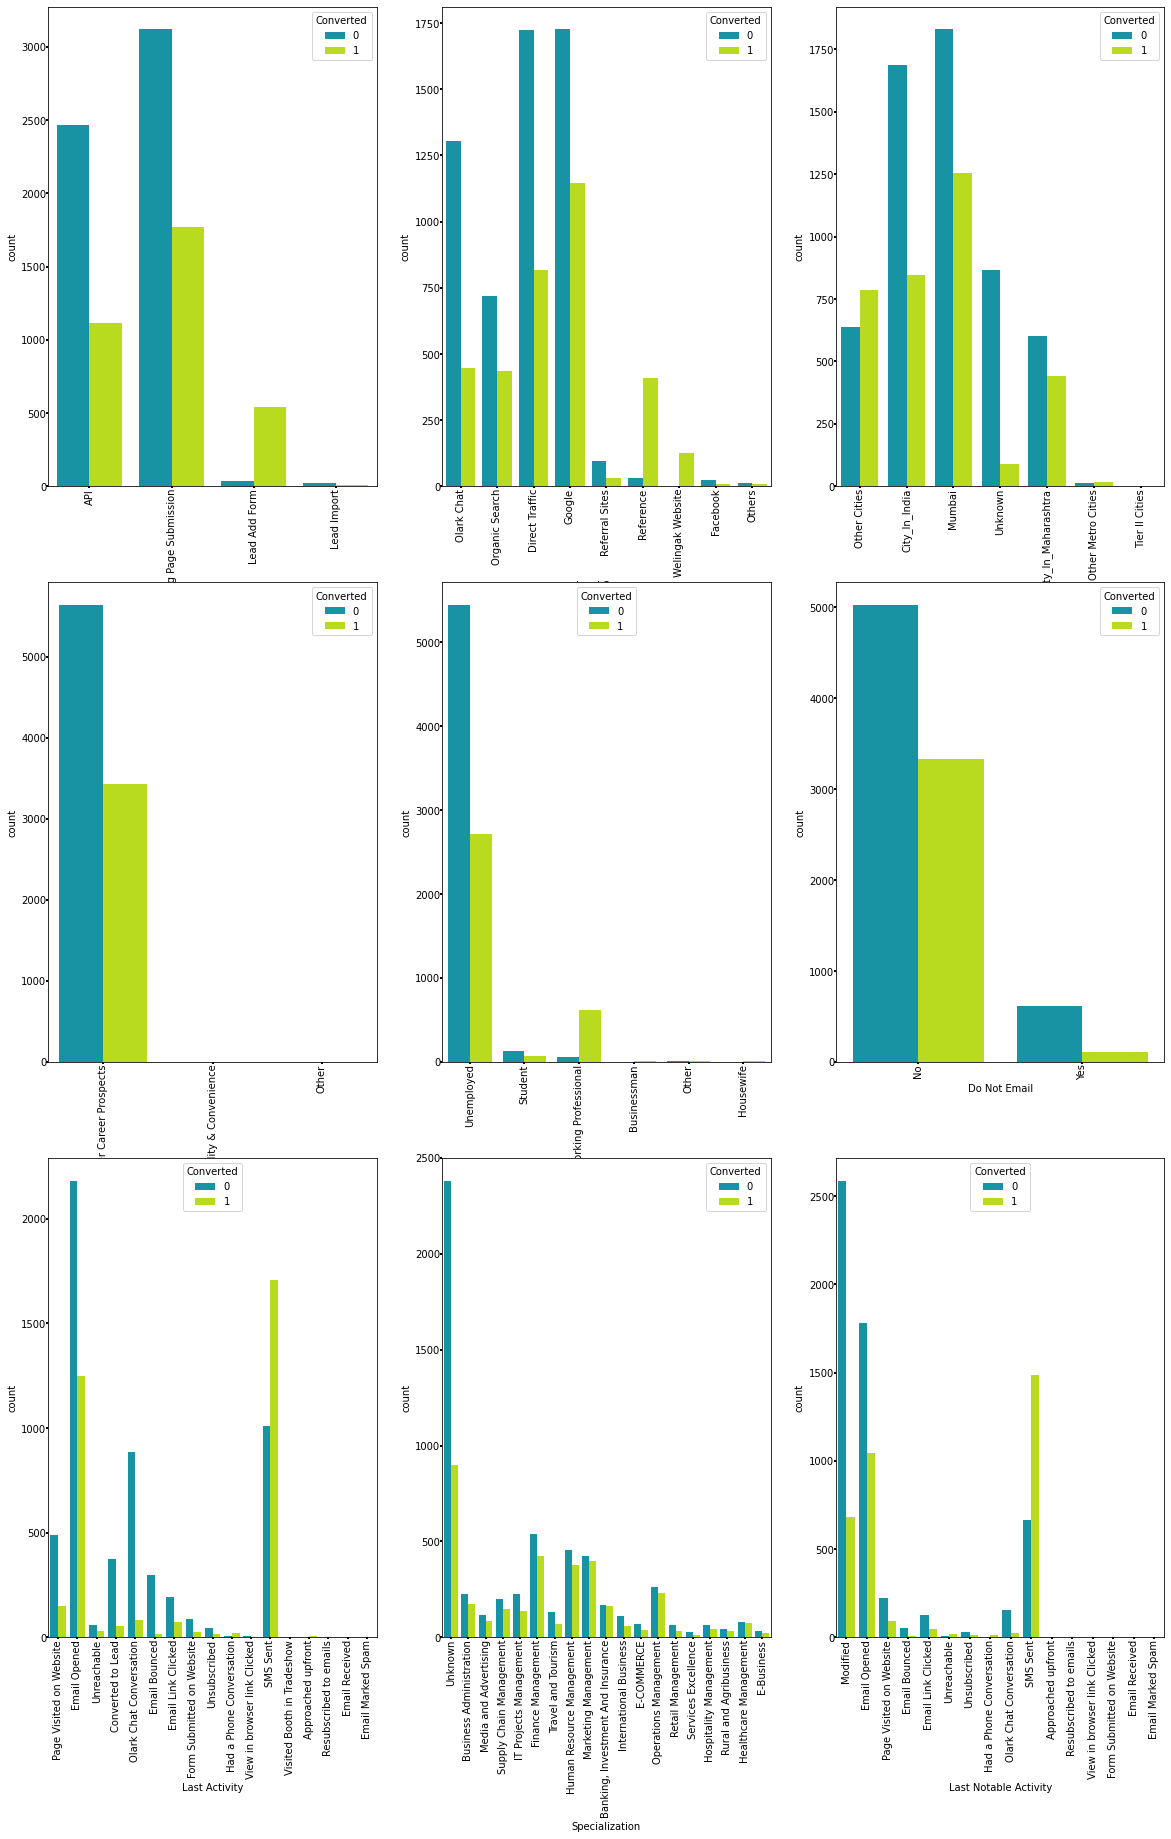

In [52]:
x = plt.figure(figsize=[20,30])
col = ["Lead Origin","Lead Source","City", "Course_Reasoning","Occupation", "Do Not Email",
       "Last Activity", "Specialization", "Last Notable Activity"]

for i in enumerate(col):
    plt.subplot(3,3,i[0]+1)     
    ax = sns.countplot(x=df[i[1]], hue="Converted", data=df,palette='nipy_spectral')
    ax.tick_params(direction='out', length=2, width=2, grid_color='y', pad=0)
    plt.xticks(rotation=90)

**Inference:** <br/> 
Analysis Summary:

1. Most of the customers not showing interest in calls than emails(email acceptance rate: ~8%)
2. Time spent on website has all the ranges, but maximum records are in 0
3. As the total number visits increases, pages viewed count also increases
4. 99% of the customers not interested in following up Ads, Articles, Forums, Newspapers, Receiving frequent updates, reactive to DMs also not willing to pay through cheque.However, they show interest in materials on "Mastering The Interview".
5. Lead Origin: Maximum of the customer is landing on the submission page to take the decision as per the record. Comparatively Lead Add Form statused customers are having high probability of conversion
6. Lead Source: Google, Direct Traffic zones are having lot of customers in record. Even though the reference-category is in smaller amount, the lead conversion rate is high
7. City: Most of the customers are from india and particularly mumbai. Also they are having greater chances of converting-leads
8. Course purpose: everyone is looking for better career prospects
9. Occupation: Maximum of the records are in unemployed but still leads are appearing to be the working professionals
10. Last Activity: SMS sent is the most popular category with high conversion rate.
11. Specialization: various specializations are popular among customers like, Finance, HR, Markgeting and operation management details. The good picture can be measured when all the customers are insisted filling this data as maximum records are unknown
12. Last Notable Activity: SMS Sent, email opened are populare ones. Though "Modified" has lots of customers, the conversion rate is very low

   </font>

<font color="deeppink">
    
## Data Preparation
</font>

1. "Country" is highly skewed. "Last_Activity" is created for lead profiling**, 99.99% customers have only one purpose of the course which is, "Better Career Prospects".99.99% customers not allowing the "Calling" option. Considering this fact as overall understanding removing the mentioned features and focusing the below filtered features.

In [53]:
# Column name readability fix
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['Prospect_ID', 'Lead_Number', 'Lead_Origin', 'Lead_Source',
       'Do_Not_Email', 'Do_Not_Call', 'Converted', 'TotalVisits',
       'Last_Activity', 'Country', 'Specialization', 'Search', 'Magazine',
       'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Advertisement', 'Through_Recommendations',
       'Receive_More_Updates_About_Our_Courses',
       'Update_me_on_Supply_Chain_Content', 'Get_updates_on_DM_Content',
       'City', 'I_agree_to_pay_the_amount_through_cheque',
       'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity',
       'Course_Reasoning', 'Occupation', 'TimeSpentOnWebsite',
       'PageViewsPerVisit'],
      dtype='object')

In [54]:
#backup
df_Org = df

In [55]:
df = df_Org[['Lead_Origin', 'Lead_Source','Do_Not_Email', 'Converted', 'TotalVisits',
        'Specialization', 'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity',
       'Occupation', 'TimeSpentOnWebsite','PageViewsPerVisit']]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead_Origin                             9074 non-null   object 
 1   Lead_Source                             9074 non-null   object 
 2   Do_Not_Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Specialization                          9074 non-null   object 
 6   A_free_copy_of_Mastering_The_Interview  9074 non-null   object 
 7   Last_Notable_Activity                   9074 non-null   object 
 8   Occupation                              9074 non-null   object 
 9   TimeSpentOnWebsite                      9074 non-null   int64  
 10  PageViewsPerVisit                       9074 non-null   floa

In [57]:
# validate value_counts
cols = df.select_dtypes(include="object").columns.tolist()
x = pd.DataFrame(df[cols].melt(var_name="column", value_name="value"))
x.reset_index(drop=True,inplace=True)
count = pd.DataFrame(x.groupby(["column"])["value"].value_counts())
pd.set_option('display.max_rows', 70)
count

value
column                                 value                                   
A_free_copy_of_Mastering_The_Interview No                                  6186
                                       Yes                                 2888
Do_Not_Email                           No                                  8358
                                       Yes                                  716
Last_Notable_Activity                  Modified                            3267
                                       Email Opened                        2823
                                       SMS Sent                            2152
                                       Page Visited on Website              318
                                       Olark Chat Conversation              183
                                       Email Link Clicked                   173
                                       Email Bounced                         60
                                       Unsubscribed                          45
                                       Unreachable                           32
                                       Had a Phone Conversation              14
                                       Email Marked Spam                      2
                                       Approached upfront                     1
                                       Email Received                         1
                                       Form Submitted on Website              1
                                       Resubscribed to emails                 1
                                       View in browser link Clicked           1
Lead_Origin                            Landing Page Submission             4885
                                       API                                 3578
                                       Lead Add Form                        581
                                       Lead Import                           30
Lead_Source                            Google                              2873
                                       Direct Traffic                      2543
                                       Olark Chat                          1753
                                       Organic Search                      1154
                                       Reference                            443
                                       Welingak Website                     129
                                       Referral Sites                       125
                                       Facebook                              31
                                       Others                                23
Occupation                             Unemployed                          8159
                                       Working Professional                 677
                                       Student                              206
                                       Other                                 15
                                       Housewife                              9
                                       Businessman                            8
Specialization                         Unknown                             3282
                                       Finance Management                   959
                                       Human Resource Management            837
                                       Marketing Management                 823
                                       Operations Management                499
                                       Business Administration              399
                                       IT Projects Management               366
                                       Supply Chain Management              346
                                       Banking, Investment And Insurance    335
                                       Media and Advertising              

In [58]:
pd.reset_option('display.max_rows')

**Converting Categorical value to numerical**

In [59]:
df["Do_Not_Email"] = df["Do_Not_Email"].map({"Yes": 1, "No":0})
df["A_free_copy_of_Mastering_The_Interview"] = df["A_free_copy_of_Mastering_The_Interview"].map({"Yes": 1, "No":0})

### Create Dummy Variables

In [60]:
cols.remove("Do_Not_Email")
cols.remove("A_free_copy_of_Mastering_The_Interview")

In [61]:
for i in cols:
    d1 = pd.get_dummies(df[i], prefix=i, drop_first=True)
    df = pd.concat([df, d1], axis=1)

In [62]:
# drop existing columns
df.drop(cols, axis=1, inplace=True)

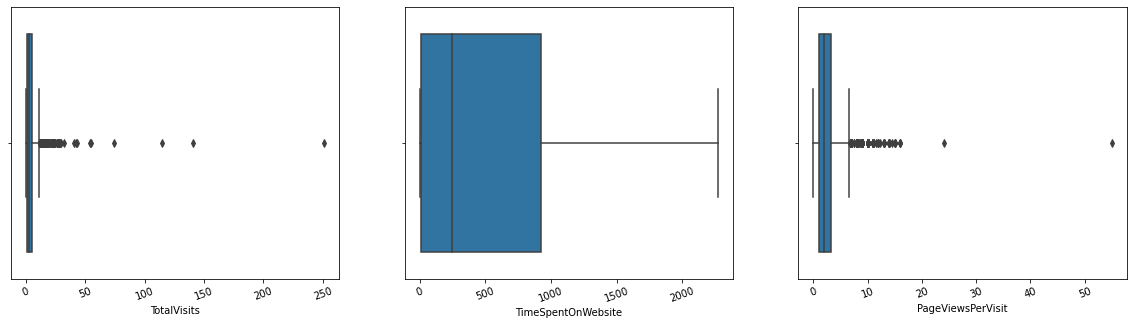

In [63]:
# visualization after the outlier Check
plt.figure(figsize=[20,5])
col = ["TotalVisits", "TimeSpentOnWebsite", "PageViewsPerVisit"]

for i in enumerate(col):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xticks(rotation=20)

<font color="tomato">

**Inference:** <br/> 
Customers visited the website on greater number of times and the page views per visit look dramatically high in few records
   </font>

<font color="darkred">
    
## Modelling

<font color="darkred">
    
**Split Train and Test Data**

In [64]:
X = df.drop(["Converted"], axis=1)
X.head()

,Do_Not_Email,TotalVisits,A_free_copy_of_Mastering_The_Interview,TimeSpentOnWebsite,PageViewsPerVisit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,0,0.0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,5.0,0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1.0,0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,2.0,0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [65]:
y = df ["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 100)

<font color="darkred">
    
**Perform Scaling**

In [67]:
# initialize
scaler = StandardScaler()

In [68]:
X_train[["TotalVisits", "TimeSpentOnWebsite", "PageViewsPerVisit"]] = scaler.fit_transform(X_train[["TotalVisits", "TimeSpentOnWebsite", "PageViewsPerVisit"]])
X_train.head()

,Do_Not_Email,TotalVisits,A_free_copy_of_Mastering_The_Interview,TimeSpentOnWebsite,PageViewsPerVisit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
3009,0,-0.284595,1,-0.160255,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1012,1,-0.284595,0,-0.540048,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9226,0,-0.671384,0,-0.888650,-1.132538,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4750,0,-0.284595,0,1.643304,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7987,0,0.295588,0,2.017593,0.058552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


<font color="darkred">

**Check "Converted" Rate**

In [69]:
converted = (sum(df["Converted"]) / len(df["Converted"].index)) * 100
converted

37.85541106458012

**This is not very high imbalance. The data seems to be fine to execute the model**

<font color="darkred">
    
#### Check Correlation

In [70]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
set(to_drop)

{'Lead_Source_Facebook'}

In [71]:
# drop the highly correlated variable
df.drop(to_drop,axis=1,inplace=True)
X_train = X_train.drop(to_drop,1)
X_test = X_test.drop(to_drop,1)

### Logistic Regression Model

In [72]:
logml = sm.GLM (y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6297
Model Family:                Binomial   Df Model:                           53
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.8
Date:                Mon, 11 Jan 2021   Deviance:                       5183.5
Time:                        07:24:32   Pearson chi2:                 6.36e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 22.8228   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Do_Not_Email                                          -1.6814      0.212     -7.944      0.000      -2.096      -1.267
TotalVisits                                            0.1925      0.053      3.644      0.000       0.089       0.296
A_free_copy_of_Mastering_The_Interview                -0.1508      0.110     -1.369      0.171      -0.367       0.065
TimeSpentOnWebsite                                     1.1212      0.041     27.119      0.000       1.040       1.202
PageViewsPerVisit                                     -0.1305      0.052     -2.488      0.013      -0.233      -0.028
Lead_Origin_Landing Page Submission                   -0.9181      0.137     -6.708      0.000      -1.186      -0.650
Lead_Origin_Lead Add Form                              1.2117      1.031      1.175      0.240      -0.810       3.233
Lead_Origin_Lead Import                                1.2574      0.493      2.553      0.011       0.292       2.223
Lead_Source_Google                                     0.2541      0.115      2.208      0.027       0.029       0.480
Lead_Source_Olark Chat                                 1.1777      0.161      7.329      0.000       0.863       1.493
Lead_Source_Organic Search                             0.1451      0.132      1.097      0.272      -0.114       0.404
Lead_Source_Others                                     0.6340      0.666      0.952      0.341      -0.672       1.940
Lead_Source_Reference                                  2.4798      1.058      2.344      0.019       0.406       4.553
Lead_Source_Referral Sites                            -0.0656      0.350     -0.188      0.851      -0.751       0.620
Lead_Source_Welingak Website                           5.1502      1.267      4.064      0.000       2.666       7.634
Specialization_Business Administration                -0.2865      0.245     -1.171      0.242      -0.766       0.193
Specialization_E-Business                              0.1558      0.477      0.327      0.744      -0.779       1.090
Specialization_E-COMMERCE                              0.0619      0.365      0.169      0.865      -0.654       0.778
Specialization_Finance Management                     -0.1580      0.206     -0.767      0.443      -0.561       0.245
Specialization_Healthcare Management                  -0.2642      0.316     -0.837      0.403      -0.883       0.355
Specialization_Hospitality Management                 -0.6357      0.374     -1.701      0.089      -1.368       0.097
Specialization_Human Resource Management              -0.2069      0.208     -0.995      0.320      -0.614  

<font color="darkred">
    
**The lower the p-val, the higher the statistical significance**

Here many of the variables have higher p-values which implies that the variable is statistically insignificant. To build a better model, few of the variables need to be eliminated

<font color="darkred">

#### Feature Elimination Using RFE

In [73]:
logreg = LogisticRegression()

rfe = RFE(logreg, 20)

rfe = rfe.fit(X_train, y_train)

In [74]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False,  True,  True,  True, False,  True,  True,
        True,  True, False,  True, False, False,  True,  True])

In [75]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do_Not_Email', True, 1),
 ('TotalVisits', False, 17),
 ('A_free_copy_of_Mastering_The_Interview', False, 16),
 ('TimeSpentOnWebsite', True, 1),
 ('PageViewsPerVisit', False, 18),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', True, 1),
 ('Lead_Source_Google', False, 11),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 22),
 ('Lead_Source_Others', False, 23),
 ('Lead_Source_Reference', True, 1),
 ('Lead_Source_Referral Sites', False, 24),
 ('Lead_Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 20),
 ('Specialization_E-Business', False, 12),
 ('Specialization_E-COMMERCE', False, 13),
 ('Specialization_Finance Management', False, 31),
 ('Specialization_Healthcare Management', False, 25),
 ('Specialization_Hospitality Management', False, 4),
 ('Specialization_Human Resource Management', False, 27),
 ('Specialization_IT Projects Management', False,

In [76]:
col = X_train.columns[rfe.support_]

In [77]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A_free_copy_of_Mastering_The_Interview',
       'PageViewsPerVisit', 'Lead_Source_Google', 'Lead_Source_Organic Search',
       'Lead_Source_Others', 'Lead_Source_Referral Sites',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'Last_Notable_Activity_Email

  ### Assessing the model with StatsModels

### Model Assessment: 1

In [78]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.1
Date:                Mon, 11 Jan 2021   Deviance:                       5234.1
Time:                        07:24:34   Pearson chi2:                 6.38e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.2417      0.242      1.001      0.317      -0.232       0.715
Do_Not_Email                                      -1.6510      0.192     -8.589      0.000      -2.028      -1.274
TimeSpentOnWebsite                                 1.1153      0.041     27.321      0.000       1.035       1.195
Lead_Origin_Landing Page Submission               -1.0905      0.128     -8.501      0.000      -1.342      -0.839
Lead_Origin_Lead Add Form                          1.5725      0.905      1.738      0.082      -0.201       3.346
Lead_Origin_Lead Import                            1.0902      0.479      2.277      0.023       0.152       2.029
Lead_Source_Olark Chat                             0.9898      0.121      8.204      0.000       0.753       1.226
Lead_Source_Reference                              1.9308      0.929      2.078      0.038       0.110       3.751
Lead_Source_Welingak Website                       4.6116      1.163      3.966      0.000       2.333       6.890
Specialization_Unknown                            -1.1579      0.124     -9.308      0.000      -1.402      -0.914
Last_Notable_Activity_Email Marked Spam           22.3786   3.34e+04      0.001      0.999   -6.55e+04    6.56e+04
Last_Notable_Activity_Had a Phone Conversation     3.3164      1.100      3.015      0.003       1.161       5.472
Last_Notable_Activity_Modified                    -0.6415      0.085     -7.579      0.000      -0.807      -0.476
Last_Notable_Activity_Olark Chat Conversation     -1.2583      0.331     -3.805      0.000      -1.907      -0.610
Last_Notable_Activity_Resubscribed to emails      23.9459   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last_Notable_Activity_SMS Sent                     1.5023      0.087     17.243      0.000       1.332       1.673
Last_Notable_Activity_Unreachable                  1.6317      0.476      3.430      0.001       0.699       2.564
Last_Notable_Activity_Unsubscribed                 1.4755      0.531      2.780      0.005       0.435       2.516
Occupation_Housewife                              22.3061   1.52e+04      0.001      0.999   -2.97e+04    2.98e+04
Occupation_Unemployed                             -0.4622      0.214     -2.157      0.031      -0.882      -0.042
Occupation_Working Professional                    2.1645      0.285      7.596      0.000       1.606       2.723
==================================================================================================================
"""

**Predicated values on the train set**

In [79]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18394851, 0.10952588, 0.11698918, 0.88330261, 0.57389966,
       0.77095608, 0.09161706, 0.96786676, 0.85138477, 0.52990046])

In [80]:
# Creating Dataframe with actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({"converted": y_train.values, "converted_prob": y_train_pred})
y_train_pred_final["prospectID"] = y_train.index
y_train_pred_final.head()

,converted,converted_prob,prospectID
0,0,0.183949,3009
1,0,0.109526,1012
2,0,0.116989,9226
3,1,0.883303,4750
4,1,0.573900,7987


Creating new column predicted with 1 if converted_prob > 0.5 else 0

In [81]:
y_train_pred_final["predicted"] = y_train_pred_final["converted_prob"].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,converted,converted_prob,prospectID,predicted
0,0,0.183949,3009,0
1,0,0.109526,1012,0
2,0,0.116989,9226,0
3,1,0.883303,4750,1
4,1,0.573900,7987,1


### Confusion Matrix

In [82]:
confusion = metrics.confusion_matrix(y_train_pred_final["converted"], y_train_pred_final["predicted"])
print(confusion)

[[3465  440]
 [ 726 1720]]


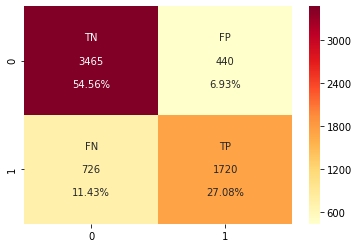

In [83]:
# plot confusion matrix

grp_name = ["TN", "FP", "FN", "TP"]
grp_counts = ["{0:0.0f}".format(val) for val in confusion.flatten()]
grp_perc = ["{0:0.2%}".format(val) for val in confusion.flatten()/np.sum(confusion)]
labels =[f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(grp_name, grp_counts, grp_perc)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt='', cmap="YlOrRd")
plt.show()


**Accuray**

In [84]:
print(metrics.accuracy_score(y_train_pred_final["converted"], y_train_pred_final["predicted"]))

0.8164068650606203


In [85]:
# Checking VIF

vif = pd.DataFrame()
vif["Features"] = X_train_sm[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,Lead_Origin_Lead Add Form,62.58
6,Lead_Source_Reference,48.07
7,Lead_Source_Welingak Website,15.50
18,Occupation_Unemployed,9.93
2,Lead_Origin_Landing Page Submission,5.80
8,Specialization_Unknown,4.00
5,Lead_Source_Olark Chat,2.12
11,Last_Notable_Activity_Modified,2.04
14,Last_Notable_Activity_SMS Sent,1.72
19,Occupation_Working Professional,1.68


In [86]:
#Dropping high p-value variable: "Last_Notable_Activity_Email Marked Spam"
col = col.drop(['Last_Notable_Activity_Email Marked Spam'],1)

### Model Assessment 2

In [87]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.3
Date:                Mon, 11 Jan 2021   Deviance:                       5236.5
Time:                        07:24:34   Pearson chi2:                 6.39e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.2422      0.242      1.003      0.316      -0.231       0.716
Do_Not_Email                                      -1.6204      0.189     -8.554      0.000      -1.992      -1.249
TimeSpentOnWebsite                                 1.1169      0.041     27.373      0.000       1.037       1.197
Lead_Origin_Landing Page Submission               -1.0917      0.128     -8.510      0.000      -1.343      -0.840
Lead_Origin_Lead Add Form                          1.5736      0.905      1.739      0.082      -0.200       3.347
Lead_Origin_Lead Import                            1.0910      0.479      2.278      0.023       0.152       2.030
Lead_Source_Olark Chat                             0.9920      0.121      8.222      0.000       0.756       1.228
Lead_Source_Reference                              1.9469      0.929      2.095      0.036       0.126       3.768
Lead_Source_Welingak Website                       4.6056      1.162      3.962      0.000       2.327       6.884
Specialization_Unknown                            -1.1600      0.124     -9.324      0.000      -1.404      -0.916
Last_Notable_Activity_Had a Phone Conversation     3.3153      1.100      3.014      0.003       1.159       5.471
Last_Notable_Activity_Modified                    -0.6451      0.085     -7.624      0.000      -0.811      -0.479
Last_Notable_Activity_Olark Chat Conversation     -1.2612      0.331     -3.812      0.000      -1.910      -0.613
Last_Notable_Activity_Resubscribed to emails      23.9446   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last_Notable_Activity_SMS Sent                     1.4987      0.087     17.213      0.000       1.328       1.669
Last_Notable_Activity_Unreachable                  1.6299      0.476      3.427      0.001       0.698       2.562
Last_Notable_Activity_Unsubscribed                 1.4427      0.530      2.723      0.006       0.404       2.481
Occupation_Housewife                              22.3057   1.52e+04      0.001      0.999   -2.97e+04    2.97e+04
Occupation_Unemployed                             -0.4602      0.214     -2.147      0.032      -0.880      -0.040
Occupation_Working Professional                    2.1646      0.285      7.595      0.000       1.606       2.723
==================================================================================================================
"""

**Predicated values on the train set**

In [88]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18412147, 0.11219832, 0.11674362, 0.88333526, 0.57411129,
       0.77081632, 0.0916214 , 0.96792411, 0.85208884, 0.53005543])

In [89]:
# Creating Dataframe with actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({"converted": y_train.values, "converted_prob": y_train_pred})
y_train_pred_final["prospectID"] = y_train.index
y_train_pred_final.head()

,converted,converted_prob,prospectID
0,0,0.184121,3009
1,0,0.112198,1012
2,0,0.116744,9226
3,1,0.883335,4750
4,1,0.574111,7987


Creating new column predicted with 1 if converted_prob > 0.5 else 0

In [90]:
y_train_pred_final["predicted"] = y_train_pred_final["converted_prob"].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,converted,converted_prob,prospectID,predicted
0,0,0.184121,3009,0
1,0,0.112198,1012,0
2,0,0.116744,9226,0
3,1,0.883335,4750,1
4,1,0.574111,7987,1


### Confusion Matrix

In [91]:
confusion = metrics.confusion_matrix(y_train_pred_final["converted"], y_train_pred_final["predicted"])
print(confusion)

[[3467  438]
 [ 725 1721]]


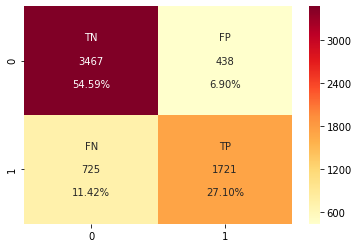

In [92]:
# plot confusion matrix

grp_name = ["TN", "FP", "FN", "TP"]
grp_counts = ["{0:0.0f}".format(val) for val in confusion.flatten()]
grp_perc = ["{0:0.2%}".format(val) for val in confusion.flatten()/np.sum(confusion)]
labels =[f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(grp_name, grp_counts, grp_perc)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt='', cmap="YlOrRd")
plt.show()


**Accuray**

In [93]:
print(metrics.accuracy_score(y_train_pred_final["converted"], y_train_pred_final["predicted"]))

0.8168792316170682


In [94]:
# Checking VIF

vif = pd.DataFrame()
vif["Features"] = X_train_sm[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,Lead_Origin_Lead Add Form,62.58
6,Lead_Source_Reference,48.07
7,Lead_Source_Welingak Website,15.50
17,Occupation_Unemployed,9.93
2,Lead_Origin_Landing Page Submission,5.80
8,Specialization_Unknown,4.00
5,Lead_Source_Olark Chat,2.12
10,Last_Notable_Activity_Modified,2.04
13,Last_Notable_Activity_SMS Sent,1.72
18,Occupation_Working Professional,1.68


In [95]:
#Dropping high p-val: "Last_Notable_Activity_Resubscribed to emails"
col = col.drop(['Last_Notable_Activity_Resubscribed to emails'],1)

### Model Assessment 3

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.9
Date:                Mon, 11 Jan 2021   Deviance:                       5239.7
Time:                        07:24:35   Pearson chi2:                 6.39e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.2407      0.242      0.997      0.319      -0.233       0.714
Do_Not_Email                                      -1.6203      0.189     -8.554      0.000      -1.992      -1.249
TimeSpentOnWebsite                                 1.1168      0.041     27.372      0.000       1.037       1.197
Lead_Origin_Landing Page Submission               -1.0903      0.128     -8.500      0.000      -1.342      -0.839
Lead_Origin_Lead Add Form                          1.5733      0.905      1.738      0.082      -0.201       3.347
Lead_Origin_Lead Import                            1.0908      0.479      2.278      0.023       0.152       2.029
Lead_Source_Olark Chat                             0.9968      0.121      8.266      0.000       0.760       1.233
Lead_Source_Reference                              1.9475      0.929      2.096      0.036       0.126       3.769
Lead_Source_Welingak Website                       4.6055      1.163      3.961      0.000       2.327       6.884
Specialization_Unknown                            -1.1580      0.124     -9.309      0.000      -1.402      -0.914
Last_Notable_Activity_Had a Phone Conversation     3.3140      1.100      3.013      0.003       1.158       5.470
Last_Notable_Activity_Modified                    -0.6478      0.085     -7.659      0.000      -0.814      -0.482
Last_Notable_Activity_Olark Chat Conversation     -1.2658      0.331     -3.827      0.000      -1.914      -0.618
Last_Notable_Activity_SMS Sent                     1.4963      0.087     17.192      0.000       1.326       1.667
Last_Notable_Activity_Unreachable                  1.6279      0.476      3.423      0.001       0.696       2.560
Last_Notable_Activity_Unsubscribed                 1.4403      0.530      2.718      0.007       0.402       2.479
Occupation_Housewife                              22.3060   1.52e+04      0.001      0.999   -2.97e+04    2.97e+04
Occupation_Unemployed                             -0.4586      0.214     -2.140      0.032      -0.879      -0.039
Occupation_Working Professional                    2.1657      0.285      7.600      0.000       1.607       2.724
==================================================================================================================
"""

**Predicated values on the train set**

In [97]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18435304, 0.11252177, 0.11718581, 0.88322729, 0.5737801 ,
       0.77064237, 0.09175491, 0.96784687, 0.85225134, 0.52972147])

In [98]:
# Creating Dataframe with actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({"converted": y_train.values, "converted_prob": y_train_pred})
y_train_pred_final["prospectID"] = y_train.index
y_train_pred_final.head()

,converted,converted_prob,prospectID
0,0,0.184353,3009
1,0,0.112522,1012
2,0,0.117186,9226
3,1,0.883227,4750
4,1,0.573780,7987


Creating new column predicted with 1 if converted_prob > 0.5 else 0

In [99]:
y_train_pred_final["predicted"] = y_train_pred_final["converted_prob"].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,converted,converted_prob,prospectID,predicted
0,0,0.184353,3009,0
1,0,0.112522,1012,0
2,0,0.117186,9226,0
3,1,0.883227,4750,1
4,1,0.573780,7987,1


### Confusion Matrix

In [100]:
confusion = metrics.confusion_matrix(y_train_pred_final["converted"], y_train_pred_final["predicted"])
print(confusion)

[[3466  439]
 [ 726 1720]]


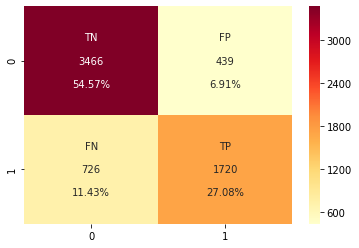

In [101]:
# plot confusion matrix

grp_name = ["TN", "FP", "FN", "TP"]
grp_counts = ["{0:0.0f}".format(val) for val in confusion.flatten()]
grp_perc = ["{0:0.2%}".format(val) for val in confusion.flatten()/np.sum(confusion)]
labels =[f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(grp_name, grp_counts, grp_perc)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt='', cmap="YlOrRd")
plt.show()


**Accuray**

In [102]:
print(metrics.accuracy_score(y_train_pred_final["converted"], y_train_pred_final["predicted"]))

0.8165643205794363


In [103]:
# Checking VIF

vif = pd.DataFrame()
vif["Features"] = X_train_sm[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,Lead_Origin_Lead Add Form,62.58
6,Lead_Source_Reference,48.07
7,Lead_Source_Welingak Website,15.50
16,Occupation_Unemployed,9.93
2,Lead_Origin_Landing Page Submission,5.80
8,Specialization_Unknown,4.00
5,Lead_Source_Olark Chat,2.12
10,Last_Notable_Activity_Modified,2.04
12,Last_Notable_Activity_SMS Sent,1.72
17,Occupation_Working Professional,1.68


In [104]:
#Dropping high p-val: "Occupation_Housewife"
col = col.drop(['Occupation_Housewife'],1)

### Model Assessment 4

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.0
Date:                Mon, 11 Jan 2021   Deviance:                       5246.1
Time:                        07:24:36   Pearson chi2:                 6.40e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.3233      0.237      1.363      0.173      -0.141       0.788
Do_Not_Email                                      -1.6229      0.189     -8.569      0.000      -1.994      -1.252
TimeSpentOnWebsite                                 1.1160      0.041     27.378      0.000       1.036       1.196
Lead_Origin_Landing Page Submission               -1.0893      0.128     -8.500      0.000      -1.340      -0.838
Lead_Origin_Lead Add Form                          1.5733      0.905      1.738      0.082      -0.200       3.347
Lead_Origin_Lead Import                            1.0894      0.479      2.275      0.023       0.151       2.028
Lead_Source_Olark Chat                             0.9945      0.121      8.250      0.000       0.758       1.231
Lead_Source_Reference                              1.9554      0.929      2.104      0.035       0.134       3.777
Lead_Source_Welingak Website                       4.6069      1.163      3.962      0.000       2.328       6.886
Specialization_Unknown                            -1.1598      0.124     -9.330      0.000      -1.403      -0.916
Last_Notable_Activity_Had a Phone Conversation     3.3105      1.100      3.010      0.003       1.155       5.466
Last_Notable_Activity_Modified                    -0.6511      0.085     -7.703      0.000      -0.817      -0.485
Last_Notable_Activity_Olark Chat Conversation     -1.2705      0.331     -3.840      0.000      -1.919      -0.622
Last_Notable_Activity_SMS Sent                     1.4933      0.087     17.161      0.000       1.323       1.664
Last_Notable_Activity_Unreachable                  1.6247      0.476      3.415      0.001       0.692       2.557
Last_Notable_Activity_Unsubscribed                 1.4412      0.530      2.720      0.007       0.403       2.479
Occupation_Unemployed                             -0.5387      0.209     -2.572      0.010      -0.949      -0.128
Occupation_Working Professional                    2.0845      0.281      7.411      0.000       1.533       2.636
==================================================================================================================
"""

**Predicated values on the train set**

In [106]:

y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18488621, 0.11235365, 0.11675439, 0.88313706, 0.57341555,
       0.77058847, 0.09209776, 0.9677836 , 0.8524109 , 0.52938133])

In [107]:
# Creating Dataframe with actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({"converted": y_train.values, "converted_prob": y_train_pred})
y_train_pred_final["prospectID"] = y_train.index
y_train_pred_final.head()

,converted,converted_prob,prospectID
0,0,0.184886,3009
1,0,0.112354,1012
2,0,0.116754,9226
3,1,0.883137,4750
4,1,0.573416,7987


**Creating new column predicted with 1 if converted_prob > 0.5 else 0**

In [108]:
y_train_pred_final["predicted"] = y_train_pred_final["converted_prob"].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,converted,converted_prob,prospectID,predicted
0,0,0.184886,3009,0
1,0,0.112354,1012,0
2,0,0.116754,9226,0
3,1,0.883137,4750,1
4,1,0.573416,7987,1


### Confusion Matrix

In [109]:
confusion = metrics.confusion_matrix(y_train_pred_final["converted"], y_train_pred_final["predicted"])
print(confusion)

[[3465  440]
 [ 726 1720]]


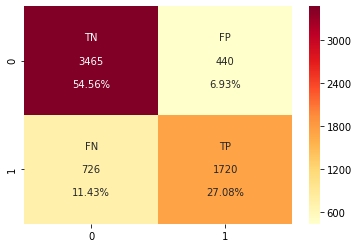

In [110]:
# plot confusion matrix

grp_name = ["TN", "FP", "FN", "TP"]
grp_counts = ["{0:0.0f}".format(val) for val in confusion.flatten()]
grp_perc = ["{0:0.2%}".format(val) for val in confusion.flatten()/np.sum(confusion)]
labels =[f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(grp_name, grp_counts, grp_perc)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt='', cmap="YlOrRd")
plt.show()


**Accuray**

In [111]:
print(metrics.accuracy_score(y_train_pred_final["converted"], y_train_pred_final["predicted"]))

0.8164068650606203


In [112]:
# Checking VIF

vif = pd.DataFrame()
vif["Features"] = X_train_sm[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,Lead_Origin_Lead Add Form,62.58
6,Lead_Source_Reference,48.06
7,Lead_Source_Welingak Website,15.50
15,Occupation_Unemployed,9.88
2,Lead_Origin_Landing Page Submission,5.77
8,Specialization_Unknown,3.99
5,Lead_Source_Olark Chat,2.12
10,Last_Notable_Activity_Modified,2.04
12,Last_Notable_Activity_SMS Sent,1.72
16,Occupation_Working Professional,1.68


In [113]:
#Dropping high p-value and high vif: "Lead_Source_Reference"
col = col.drop(['Lead_Source_Reference'],1)

### Model Assessment 5

In [114]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.8
Date:                Mon, 11 Jan 2021   Deviance:                       5249.5
Time:                        07:24:36   Pearson chi2:                 6.37e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.3242      0.237      1.369      0.171      -0.140       0.788
Do_Not_Email                                      -1.6184      0.189     -8.563      0.000      -1.989      -1.248
TimeSpentOnWebsite                                 1.1151      0.041     27.351      0.000       1.035       1.195
Lead_Origin_Landing Page Submission               -1.0876      0.128     -8.492      0.000      -1.339      -0.837
Lead_Origin_Lead Add Form                          3.4515      0.238     14.495      0.000       2.985       3.918
Lead_Origin_Lead Import                            1.0883      0.479      2.273      0.023       0.150       2.027
Lead_Source_Olark Chat                             0.9905      0.121      8.210      0.000       0.754       1.227
Lead_Source_Welingak Website                       2.7244      0.763      3.569      0.000       1.228       4.221
Specialization_Unknown                            -1.1559      0.124     -9.307      0.000      -1.399      -0.912
Last_Notable_Activity_Had a Phone Conversation     3.3101      1.100      3.010      0.003       1.154       5.466
Last_Notable_Activity_Modified                    -0.6507      0.084     -7.702      0.000      -0.816      -0.485
Last_Notable_Activity_Olark Chat Conversation     -1.2697      0.331     -3.839      0.000      -1.918      -0.622
Last_Notable_Activity_SMS Sent                     1.4919      0.087     17.152      0.000       1.321       1.662
Last_Notable_Activity_Unreachable                  1.6244      0.476      3.415      0.001       0.692       2.557
Last_Notable_Activity_Unsubscribed                 1.4369      0.530      2.714      0.007       0.399       2.475
Occupation_Unemployed                             -0.5410      0.209     -2.587      0.010      -0.951      -0.131
Occupation_Working Professional                    2.0841      0.281      7.419      0.000       1.534       2.635
==================================================================================================================
"""

**Predicated values on the train set**

In [115]:

y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18495191, 0.11346175, 0.11672038, 0.88287865, 0.57315552,
       0.77025803, 0.09218679, 0.96764653, 0.8521475 , 0.52915116])

In [116]:
# Creating Dataframe with actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({"converted": y_train.values, "converted_prob": y_train_pred})
y_train_pred_final["prospectID"] = y_train.index
y_train_pred_final.head()

,converted,converted_prob,prospectID
0,0,0.184952,3009
1,0,0.113462,1012
2,0,0.116720,9226
3,1,0.882879,4750
4,1,0.573156,7987


**Creating new column predicted with 1 if converted_prob > 0.5 else 0**

In [117]:
y_train_pred_final["predicted"] = y_train_pred_final["converted_prob"].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,converted,converted_prob,prospectID,predicted
0,0,0.184952,3009,0
1,0,0.113462,1012,0
2,0,0.116720,9226,0
3,1,0.882879,4750,1
4,1,0.573156,7987,1


### Confusion Matrix

In [118]:
confusion = metrics.confusion_matrix(y_train_pred_final["converted"], y_train_pred_final["predicted"])
print(confusion)

[[3465  440]
 [ 726 1720]]


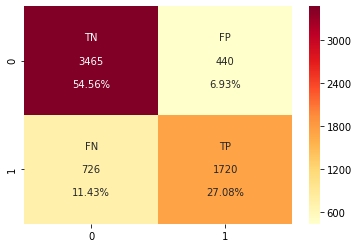

In [119]:
# plot confusion matrix

grp_name = ["TN", "FP", "FN", "TP"]
grp_counts = ["{0:0.0f}".format(val) for val in confusion.flatten()]
grp_perc = ["{0:0.2%}".format(val) for val in confusion.flatten()/np.sum(confusion)]
labels =[f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(grp_name, grp_counts, grp_perc)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt='', cmap="YlOrRd")
plt.show()


**Accuray**

In [120]:
print(metrics.accuracy_score(y_train_pred_final["converted"], y_train_pred_final["predicted"]))

0.8164068650606203


In [121]:
# Checking VIF

vif = pd.DataFrame()
vif["Features"] = X_train_sm[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
14,Occupation_Unemployed,9.88
2,Lead_Origin_Landing Page Submission,5.77
7,Specialization_Unknown,3.99
5,Lead_Source_Olark Chat,2.12
9,Last_Notable_Activity_Modified,2.04
3,Lead_Origin_Lead Add Form,1.90
11,Last_Notable_Activity_SMS Sent,1.72
15,Occupation_Working Professional,1.67
6,Lead_Source_Welingak Website,1.38
1,TimeSpentOnWebsite,1.32


In [122]:
#Dropping high p-val: "Lead_Origin_Lead Import"
col = col.drop(['Lead_Origin_Lead Import'],1)

### Model Assessment 6

In [123]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.1
Date:                Mon, 11 Jan 2021   Deviance:                       5254.2
Time:                        07:24:37   Pearson chi2:                 6.37e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.3661      0.236      1.550      0.121      -0.097       0.829
Do_Not_Email                                      -1.6193      0.189     -8.571      0.000      -1.990      -1.249
TimeSpentOnWebsite                                 1.1064      0.040     27.324      0.000       1.027       1.186
Lead_Origin_Landing Page Submission               -1.1284      0.127     -8.882      0.000      -1.377      -0.879
Lead_Origin_Lead Add Form                          3.4117      0.237     14.370      0.000       2.946       3.877
Lead_Source_Olark Chat                             0.9596      0.120      8.023      0.000       0.725       1.194
Lead_Source_Welingak Website                       2.7355      0.764      3.583      0.000       1.239       4.232
Specialization_Unknown                            -1.1805      0.124     -9.510      0.000      -1.424      -0.937
Last_Notable_Activity_Had a Phone Conversation     3.2939      1.100      2.995      0.003       1.138       5.450
Last_Notable_Activity_Modified                    -0.6549      0.084     -7.756      0.000      -0.820      -0.489
Last_Notable_Activity_Olark Chat Conversation     -1.2722      0.330     -3.852      0.000      -1.920      -0.625
Last_Notable_Activity_SMS Sent                     1.4847      0.087     17.098      0.000       1.314       1.655
Last_Notable_Activity_Unreachable                  1.6100      0.475      3.386      0.001       0.678       2.542
Last_Notable_Activity_Unsubscribed                 1.4294      0.529      2.703      0.007       0.393       2.466
Occupation_Unemployed                             -0.5344      0.209     -2.556      0.011      -0.944      -0.125
Occupation_Working Professional                    2.0909      0.281      7.445      0.000       1.540       2.641
==================================================================================================================
"""

**Predicated values on the train set**

In [124]:

y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18633141, 0.11217058, 0.11636011, 0.88143345, 0.56968563,
       0.76892005, 0.09348655, 0.96840684, 0.85008799, 0.52596783])

In [125]:
# Creating Dataframe with actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({"converted": y_train.values, "converted_prob": y_train_pred})
y_train_pred_final["prospectID"] = y_train.index
y_train_pred_final.head()

,converted,converted_prob,prospectID
0,0,0.186331,3009
1,0,0.112171,1012
2,0,0.116360,9226
3,1,0.881433,4750
4,1,0.569686,7987


**Creating new column predicted with 1 if converted_prob > 0.5 else 0**

In [126]:
y_train_pred_final["predicted"] = y_train_pred_final["converted_prob"].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,converted,converted_prob,prospectID,predicted
0,0,0.186331,3009,0
1,0,0.112171,1012,0
2,0,0.116360,9226,0
3,1,0.881433,4750,1
4,1,0.569686,7987,1


### Confusion Matrix

In [127]:
confusion = metrics.confusion_matrix(y_train_pred_final["converted"], y_train_pred_final["predicted"])
print(confusion)

[[3467  438]
 [ 725 1721]]


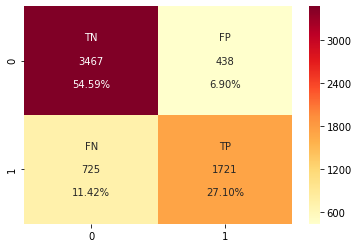

In [128]:
# plot confusion matrix

grp_name = ["TN", "FP", "FN", "TP"]
grp_counts = ["{0:0.0f}".format(val) for val in confusion.flatten()]
grp_perc = ["{0:0.2%}".format(val) for val in confusion.flatten()/np.sum(confusion)]
labels =[f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(grp_name, grp_counts, grp_perc)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt='', cmap="YlOrRd")
plt.show()


**Accuray**

In [129]:
print(metrics.accuracy_score(y_train_pred_final["converted"], y_train_pred_final["predicted"]))

0.8168792316170682


In [130]:
# Checking VIF

vif = pd.DataFrame()
vif["Features"] = X_train_sm[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
13,Occupation_Unemployed,9.70
2,Lead_Origin_Landing Page Submission,5.70
6,Specialization_Unknown,3.98
4,Lead_Source_Olark Chat,2.10
8,Last_Notable_Activity_Modified,2.04
3,Lead_Origin_Lead Add Form,1.88
10,Last_Notable_Activity_SMS Sent,1.72
14,Occupation_Working Professional,1.66
5,Lead_Source_Welingak Website,1.38
1,TimeSpentOnWebsite,1.32


In [131]:
#Dropping high p-val: "Last_Notable_Activity_Unsubscribed"
col = col.drop(['Last_Notable_Activity_Unsubscribed'],1)

### Model Assessment 7

In [132]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.4
Date:                Mon, 11 Jan 2021   Deviance:                       5260.8
Time:                        07:24:37   Pearson chi2:                 6.37e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.3693      0.236      1.565      0.118      -0.093       0.832
Do_Not_Email                                      -1.4725      0.175     -8.394      0.000      -1.816      -1.129
TimeSpentOnWebsite                                 1.1083      0.040     27.385      0.000       1.029       1.188
Lead_Origin_Landing Page Submission               -1.1329      0.127     -8.915      0.000      -1.382      -0.884
Lead_Origin_Lead Add Form                          3.4015      0.237     14.343      0.000       2.937       3.866
Lead_Source_Olark Chat                             0.9626      0.120      8.050      0.000       0.728       1.197
Lead_Source_Welingak Website                       2.7101      0.761      3.559      0.000       1.218       4.203
Specialization_Unknown                            -1.1818      0.124     -9.522      0.000      -1.425      -0.939
Last_Notable_Activity_Had a Phone Conversation     3.2855      1.100      2.987      0.003       1.130       5.442
Last_Notable_Activity_Modified                    -0.6720      0.084     -7.987      0.000      -0.837      -0.507
Last_Notable_Activity_Olark Chat Conversation     -1.2881      0.330     -3.901      0.000      -1.935      -0.641
Last_Notable_Activity_SMS Sent                     1.4660      0.086     16.966      0.000       1.297       1.635
Last_Notable_Activity_Unreachable                  1.5974      0.475      3.364      0.001       0.667       2.528
Occupation_Unemployed                             -0.5248      0.209     -2.514      0.012      -0.934      -0.116
Occupation_Working Professional                    2.1039      0.280      7.505      0.000       1.554       2.653
==================================================================================================================
"""

**Predicated values on the train set**

In [133]:

y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18754443, 0.12869731, 0.11592172, 0.88067729, 0.56847131,
       0.76738753, 0.09404752, 0.9683405 , 0.85180396, 0.52465692])

In [134]:
# Creating Dataframe with actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({"converted": y_train.values, "converted_prob": y_train_pred})
y_train_pred_final["prospectID"] = y_train.index
y_train_pred_final.head()

,converted,converted_prob,prospectID
0,0,0.187544,3009
1,0,0.128697,1012
2,0,0.115922,9226
3,1,0.880677,4750
4,1,0.568471,7987


**Creating new column predicted with 1 if converted_prob > 0.5 else 0**

In [135]:
y_train_pred_final["predicted"] = y_train_pred_final["converted_prob"].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,converted,converted_prob,prospectID,predicted
0,0,0.187544,3009,0
1,0,0.128697,1012,0
2,0,0.115922,9226,0
3,1,0.880677,4750,1
4,1,0.568471,7987,1


### Confusion Matrix

In [136]:
confusion = metrics.confusion_matrix(y_train_pred_final["converted"], y_train_pred_final["predicted"])
print(confusion)

[[3470  435]
 [ 725 1721]]


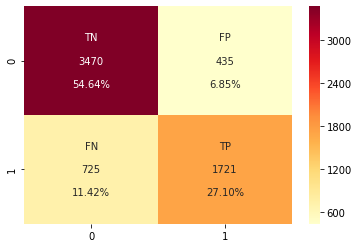

In [137]:
# plot confusion matrix

grp_name = ["TN", "FP", "FN", "TP"]
grp_counts = ["{0:0.0f}".format(val) for val in confusion.flatten()]
grp_perc = ["{0:0.2%}".format(val) for val in confusion.flatten()/np.sum(confusion)]
labels =[f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(grp_name, grp_counts, grp_perc)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt='', cmap="YlOrRd")
plt.show()


**Accuray**

In [138]:
print(metrics.accuracy_score(y_train_pred_final["converted"], y_train_pred_final["predicted"]))

0.817351598173516


In [139]:
# Checking VIF

vif = pd.DataFrame()
vif["Features"] = X_train_sm[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
12,Occupation_Unemployed,9.68
2,Lead_Origin_Landing Page Submission,5.70
6,Specialization_Unknown,3.98
4,Lead_Source_Olark Chat,2.10
8,Last_Notable_Activity_Modified,2.02
3,Lead_Origin_Lead Add Form,1.88
10,Last_Notable_Activity_SMS Sent,1.71
13,Occupation_Working Professional,1.65
5,Lead_Source_Welingak Website,1.38
1,TimeSpentOnWebsite,1.31


In [140]:
#Dropping high p-val: "Occupation_Unemployed"
col = col.drop(['Occupation_Unemployed'],1)

### Model Assessment 8

In [141]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2633.5
Date:                Mon, 11 Jan 2021   Deviance:                       5266.9
Time:                        07:24:38   Pearson chi2:                 6.38e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.1305      0.126     -1.035      0.300      -0.378       0.117
Do_Not_Email                                      -1.4707      0.176     -8.379      0.000      -1.815      -1.127
TimeSpentOnWebsite                                 1.1084      0.040     27.397      0.000       1.029       1.188
Lead_Origin_Landing Page Submission               -1.1367      0.127     -8.940      0.000      -1.386      -0.888
Lead_Origin_Lead Add Form                          3.4095      0.237     14.396      0.000       2.945       3.874
Lead_Source_Olark Chat                             0.9688      0.120      8.102      0.000       0.734       1.203
Lead_Source_Welingak Website                       2.6933      0.761      3.538      0.000       1.201       4.186
Specialization_Unknown                            -1.1922      0.124     -9.593      0.000      -1.436      -0.949
Last_Notable_Activity_Had a Phone Conversation     3.2641      1.100      2.967      0.003       1.108       5.420
Last_Notable_Activity_Modified                    -0.6793      0.084     -8.081      0.000      -0.844      -0.515
Last_Notable_Activity_Olark Chat Conversation     -1.2785      0.330     -3.880      0.000      -1.924      -0.633
Last_Notable_Activity_SMS Sent                     1.4525      0.086     16.868      0.000       1.284       1.621
Last_Notable_Activity_Unreachable                  1.5840      0.474      3.344      0.001       0.656       2.512
Occupation_Working Professional                    2.6118      0.195     13.409      0.000       2.230       2.994
==================================================================================================================
"""

**Predicated values on the train set**

In [142]:

y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19078798, 0.12820707, 0.11730488, 0.88148751, 0.57190947,
       0.76875532, 0.09586016, 0.96869302, 0.85448074, 0.52815143])

In [143]:
# Creating Dataframe with actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({"converted": y_train.values, "converted_prob": y_train_pred})
y_train_pred_final["prospectID"] = y_train.index
y_train_pred_final.head()

,converted,converted_prob,prospectID
0,0,0.190788,3009
1,0,0.128207,1012
2,0,0.117305,9226
3,1,0.881488,4750
4,1,0.571909,7987


**Creating new column predicted with 1 if converted_prob > 0.5 else 0**

In [144]:
y_train_pred_final["predicted"] = y_train_pred_final["converted_prob"].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,converted,converted_prob,prospectID,predicted
0,0,0.190788,3009,0
1,0,0.128207,1012,0
2,0,0.117305,9226,0
3,1,0.881488,4750,1
4,1,0.571909,7987,1


### Confusion Matrix

In [145]:
confusion = metrics.confusion_matrix(y_train_pred_final["converted"], y_train_pred_final["predicted"])
print(confusion)

[[3466  439]
 [ 732 1714]]


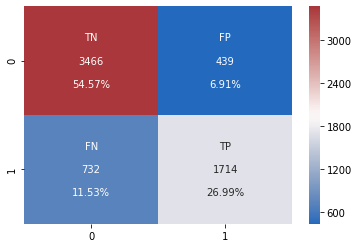

In [146]:
# plot confusion matrix

grp_name = ["TN", "FP", "FN", "TP"]
grp_counts = ["{0:0.0f}".format(val) for val in confusion.flatten()]
grp_perc = ["{0:0.2%}".format(val) for val in confusion.flatten()/np.sum(confusion)]
labels =[f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(grp_name, grp_counts, grp_perc)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt='', cmap="vlag")
plt.show()


**Accuray**

In [147]:
train_Accuracy = metrics.accuracy_score(y_train_pred_final["converted"], y_train_pred_final["predicted"])
train_Accuracy

0.8156195874665407

In [148]:
# Checking VIF

vif = pd.DataFrame()
vif["Features"] = X_train_sm[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
6,Specialization_Unknown,2.22
4,Lead_Source_Olark Chat,1.92
8,Last_Notable_Activity_Modified,1.90
2,Lead_Origin_Landing Page Submission,1.80
10,Last_Notable_Activity_SMS Sent,1.63
3,Lead_Origin_Lead Add Form,1.61
5,Lead_Source_Welingak Website,1.37
1,TimeSpentOnWebsite,1.30
12,Occupation_Working Professional,1.19
0,Do_Not_Email,1.12


In [149]:
#Dropping high p-val: "Last_Notable_Activity_Unreachable"
col = col.drop(['Last_Notable_Activity_Unreachable'],1)

### Model Assessment 9

In [150]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.2
Date:                Mon, 11 Jan 2021   Deviance:                       5278.4
Time:                        07:24:38   Pearson chi2:                 6.38e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.1039      0.126     -0.827      0.408      -0.350       0.142
Do_Not_Email                                      -1.4730      0.176     -8.393      0.000      -1.817      -1.129
TimeSpentOnWebsite                                 1.1050      0.040     27.372      0.000       1.026       1.184
Lead_Origin_Landing Page Submission               -1.1413      0.127     -8.986      0.000      -1.390      -0.892
Lead_Origin_Lead Add Form                          3.3971      0.237     14.353      0.000       2.933       3.861
Lead_Source_Olark Chat                             0.9589      0.119      8.033      0.000       0.725       1.193
Lead_Source_Welingak Website                       2.6931      0.761      3.537      0.000       1.201       4.185
Specialization_Unknown                            -1.1955      0.124     -9.628      0.000      -1.439      -0.952
Last_Notable_Activity_Had a Phone Conversation     3.2403      1.100      2.946      0.003       1.085       5.396
Last_Notable_Activity_Modified                    -0.6988      0.084     -8.343      0.000      -0.863      -0.535
Last_Notable_Activity_Olark Chat Conversation     -1.2951      0.329     -3.933      0.000      -1.941      -0.650
Last_Notable_Activity_SMS Sent                     1.4319      0.086     16.697      0.000       1.264       1.600
Occupation_Working Professional                    2.6132      0.195     13.430      0.000       2.232       2.995
==================================================================================================================
"""

**Predicated values on the train set**

In [151]:

y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19430255, 0.13042164, 0.11699038, 0.88105727, 0.57085588,
       0.76846278, 0.09805378, 0.96868045, 0.85605978, 0.5272143 ])

In [152]:
# Creating Dataframe with actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({"converted": y_train.values, "converted_prob": y_train_pred})
y_train_pred_final["prospectID"] = y_train.index
y_train_pred_final.head()

,converted,converted_prob,prospectID
0,0,0.194303,3009
1,0,0.130422,1012
2,0,0.116990,9226
3,1,0.881057,4750
4,1,0.570856,7987


**Creating new column predicted with 1 if converted_prob > 0.5 else 0**

In [153]:
y_train_pred_final["predicted"] = y_train_pred_final["converted_prob"].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,converted,converted_prob,prospectID,predicted
0,0,0.194303,3009,0
1,0,0.130422,1012,0
2,0,0.116990,9226,0
3,1,0.881057,4750,1
4,1,0.570856,7987,1


### Confusion Matrix

In [154]:
confusion = metrics.confusion_matrix(y_train_pred_final["converted"], y_train_pred_final["predicted"])
print(confusion)

[[3468  437]
 [ 737 1709]]


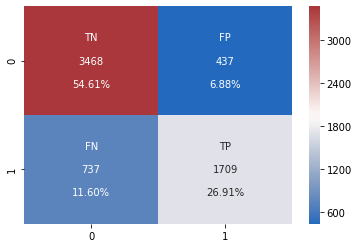

In [155]:
# plot confusion matrix

grp_name = ["TN", "FP", "FN", "TP"]
grp_counts = ["{0:0.0f}".format(val) for val in confusion.flatten()]
grp_perc = ["{0:0.2%}".format(val) for val in confusion.flatten()/np.sum(confusion)]
labels =[f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(grp_name, grp_counts, grp_perc)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt='', cmap="vlag")
plt.show()


**Accuray**

In [156]:
train_Accuracy = metrics.accuracy_score(y_train_pred_final["converted"], y_train_pred_final["predicted"])
train_Accuracy

0.815147220910093

In [157]:
# Checking VIF

vif = pd.DataFrame()
vif["Features"] = X_train_sm[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
6,Specialization_Unknown,2.21
4,Lead_Source_Olark Chat,1.92
8,Last_Notable_Activity_Modified,1.89
2,Lead_Origin_Landing Page Submission,1.79
10,Last_Notable_Activity_SMS Sent,1.62
3,Lead_Origin_Lead Add Form,1.61
5,Lead_Source_Welingak Website,1.37
1,TimeSpentOnWebsite,1.30
11,Occupation_Working Professional,1.19
0,Do_Not_Email,1.12


**Validate final model correlation**

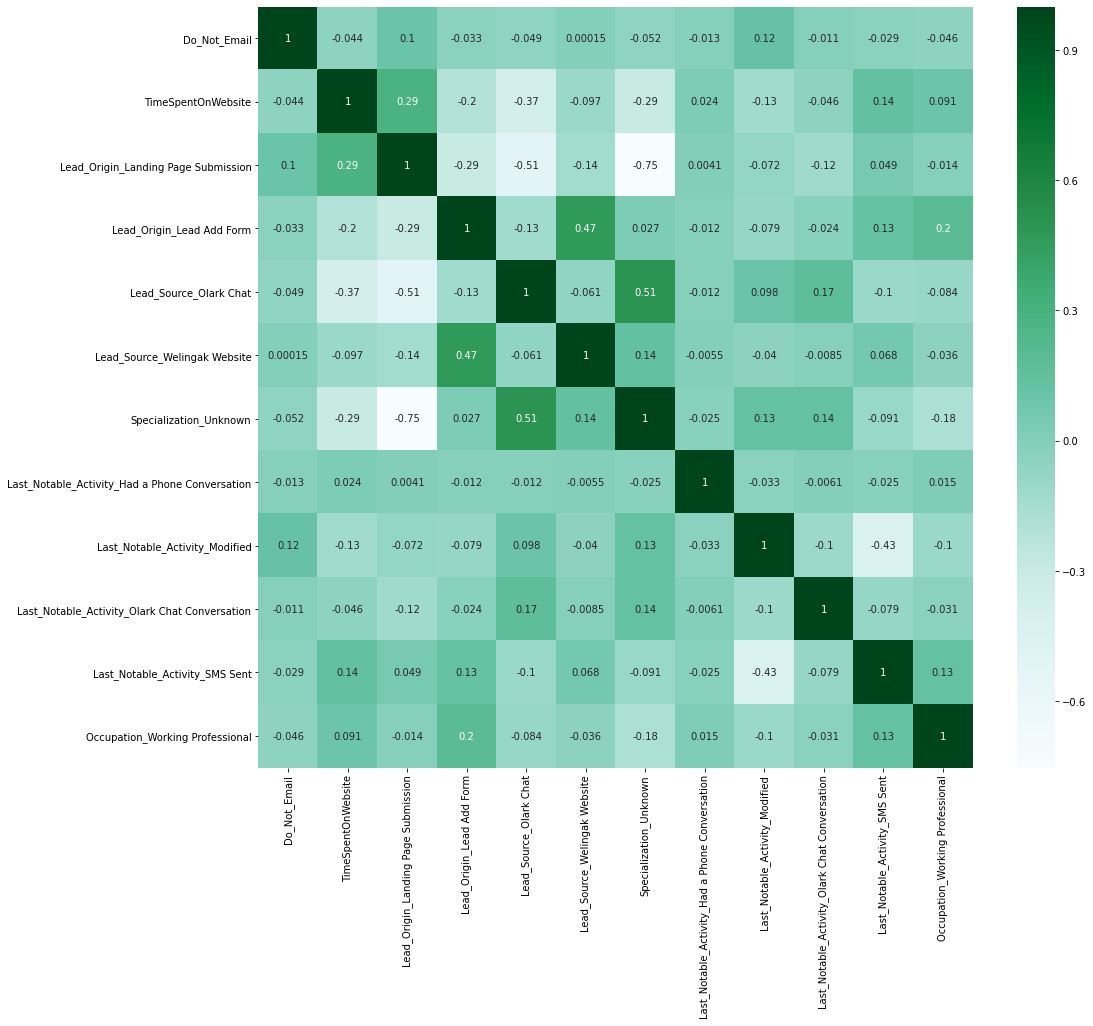

In [158]:
plt.figure(figsize=[16,14])

sns.heatmap(X_train_sm[col].corr(), annot=True, cmap="BuGn")
plt.show()

In [159]:
corr_matrix = X_train_sm[col].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

[]

**Metrics beyond simply Accuracy**
**Confusion Matrix**

In [160]:
True_Postive = confusion[1,1]
True_Negative = confusion[0,0]
False_Positive = confusion[0,1]
False_Negative = confusion[1,0]

**Sensitivity of finalized Logistic Regression Model**

In [161]:
train_Sensitivity = True_Postive / float(True_Postive + False_Negative)
train_Sensitivity

0.6986917416189697

**Specificity of finalized Logistic Regression Model**

In [162]:
train_Specificity = True_Negative / float(True_Negative + False_Positive)
train_Specificity

0.8880921895006402

**False positive rate - predicting "converted" when the customer doesn't have "converted"**

In [163]:
train_FPValue = False_Positive / float(True_Negative + False_Positive)
train_FPValue

0.1119078104993598

**Positive Predicted value**

In [164]:
train_PosPredVal = True_Postive / float(True_Postive + False_Positive)
train_PosPredVal

0.7963653308480895

**Negative Predicted value**

In [165]:
train_NegPredVal = True_Negative / float(True_Negative + False_Negative)
train_NegPredVal

0.8247324613555291

In [166]:
print("Accuracy= ",  train_Accuracy,  ", False Positive Value= ", train_FPValue, ", Negative Prediction Value= ",
      train_NegPredVal , ", Positive Prediction Value= " , train_PosPredVal, ", Sensitivity= ",  train_Sensitivity, 
       ", Specificity= " ,train_Specificity)

Accuracy=  0.815147220910093 , False Positive Value=  0.1119078104993598 , Negative Prediction Value=  0.8247324613555291 , Positive Prediction Value=  0.7963653308480895 , Sensitivity=  0.6986917416189697 , Specificity=  0.8880921895006402


### ROC Curve (Receiver Operating Characteristic Curve)

In [167]:
# function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [168]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["converted"], 
                                         y_train_pred_final["converted_prob"], drop_intermediate=False)

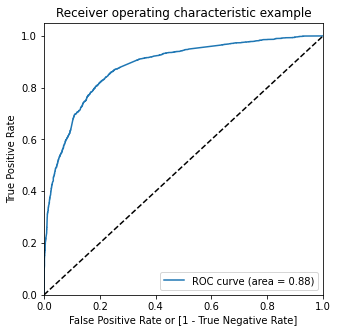

In [169]:
draw_roc(y_train_pred_final["converted"], y_train_pred_final["converted_prob"])

**Its identified as a good model since the curve is more towards the top-left corner, Roc-Curve area is 88%**

### Finding Optimal Threshold

In [170]:
# Optimal cutoff point
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i] = y_train_pred_final["converted_prob"].map(lambda x:1 if x>i else 0)

y_train_pred_final.head()

,converted,converted_prob,prospectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.194303,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.130422,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.116990,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.881057,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.570856,7987,1,1,1,1,1,1,1,0,0,0,0


In [171]:
# Calculate accuracy ; sensitivity ; specificity for probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385136     1.000000     0.000000
0.1   0.1  0.555031     0.974652     0.292190
0.2   0.2  0.755157     0.910875     0.657618
0.3   0.3  0.800031     0.849550     0.769014
0.4   0.4  0.813100     0.775143     0.836876
0.5   0.5  0.815147     0.698692     0.888092
0.6   0.6  0.795780     0.590760     0.924200
0.7   0.7  0.784601     0.523303     0.948271
0.8   0.8  0.762715     0.431725     0.970038
0.9   0.9  0.725398     0.305805     0.988220


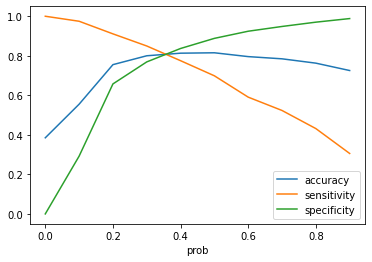

In [172]:
cutoff_df.plot.line(x="prob", y=['accuracy','sensitivity','specificity'],)
plt.show()

**From the above curve, ~0.36 is the optimum point to take it as a cutoff probobility**

In [173]:
y_train_pred_final["predicted"] = y_train_pred_final["converted_prob"].map(lambda x:1 if x>0.36 else 0)
y_train_pred_final.head()

,converted,converted_prob,prospectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.194303,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.130422,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.116990,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.881057,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.570856,7987,1,1,1,1,1,1,1,0,0,0,0


**Predict Accuracy**

In [174]:
train_Accuracy = metrics.accuracy_score(y_train_pred_final["converted"], y_train_pred_final["predicted"])
train_Accuracy

0.8107384663832468

**Confusion Matrix**

[[3176  729]
 [ 473 1973]]


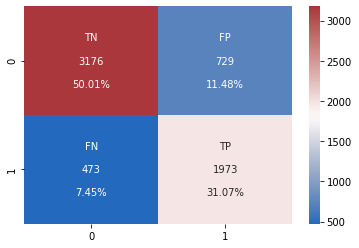

In [175]:
confusion = metrics.confusion_matrix(y_train_pred_final["converted"], y_train_pred_final["predicted"])
print(confusion)
# plot confusion matrix

grp_name = ["TN", "FP", "FN", "TP"]
grp_counts = ["{0:0.0f}".format(val) for val in confusion.flatten()]
grp_perc = ["{0:0.2%}".format(val) for val in confusion.flatten()/np.sum(confusion)]
labels =[f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(grp_name, grp_counts, grp_perc)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt='', cmap="vlag")
plt.show()


**Metrics beyond simply Accuracy**

In [176]:
True_Postive = confusion[1,1]
True_Negative = confusion[0,0]
False_Positive = confusion[0,1]
False_Negative = confusion[1,0]

**Sensitivity of finalized Logistic Regression Model**

In [177]:
train_Sensitivity = True_Postive / float(True_Postive + False_Negative)
train_Sensitivity

0.8066230580539656

**Specificity of finalized Logistic Regression Model**

In [178]:
train_Specificity = True_Negative / float(True_Negative + False_Positive)
train_Specificity

0.8133162612035851

**False positive rate - predicting "converted" when the customer doesn't have "converted"**

In [179]:
train_FPValue= False_Positive / float(True_Negative + False_Positive)
train_FPValue

0.18668373879641487

**Positive Predicted value**

In [180]:
train_PosPredVal = True_Postive / float(True_Postive + False_Positive)
train_PosPredVal

0.7301998519615099

**Negative Predicted value**

In [181]:
train_NegPredVal = True_Negative / float(True_Negative + False_Negative)
train_NegPredVal

0.870375445327487

**Precision: TP / (TP+FP)**

In [182]:
train_precision = confusion[1,1]/ (confusion[0,1] + confusion[1,1])
train_precision

0.7301998519615099

**Recall: TP / (TP+FN)**

In [183]:
train_recall = confusion[1,1]/ (confusion[1,0] + confusion[1,1])
train_recall

0.8066230580539656

**Precision Score and recall score**

In [184]:
print("Precision Score: ",precision_score(y_train_pred_final["converted"], y_train_pred_final["predicted"]))
print("Recall Score: ",recall_score(y_train_pred_final["converted"], y_train_pred_final["predicted"]))

Precision Score:  0.7301998519615099
Recall Score:  0.8066230580539656


**Precision Score and recall tradeoff**

In [185]:
p, r, thresholds = precision_recall_curve(y_train_pred_final["converted"],y_train_pred_final["converted_prob"])

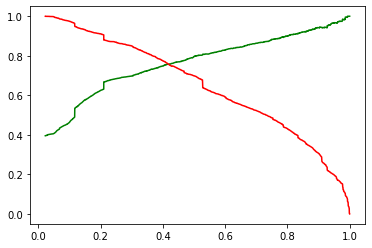

In [186]:
plt.plot(thresholds, p[:-1],"g-")
plt.plot(thresholds, r[:-1],"r-")
plt.show()

**Precision, recall tradeoff suggesting the same cutoff of 0.4 as almost like optimal cutoff 0.36**

In [187]:
train_F1_Score= 2*(train_precision * train_recall) / (train_precision + train_recall)
print(train_F1_Score)

0.7665112665112666


In [188]:
print("Accuracy= ",  train_Accuracy,  ", False Positive Value= ", train_FPValue, ", Negative Prediction Value= ",
      train_NegPredVal , ", Positive Prediction Value= " , train_PosPredVal, ", Sensitivity= ",  train_Sensitivity, 
       ", Specificity= " ,train_Specificity, ", Precision= ", train_precision, ", Recall= ", train_recall, "F1-Score= ", train_F1_Score)

Accuracy=  0.8107384663832468 , False Positive Value=  0.18668373879641487 , Negative Prediction Value=  0.870375445327487 , Positive Prediction Value=  0.7301998519615099 , Sensitivity=  0.8066230580539656 , Specificity=  0.8133162612035851 , Precision=  0.7301998519615099 , Recall=  0.8066230580539656 F1-Score=  0.7665112665112666


<font color="teal">
    
## Prediction On Train-data


Accuracy=  0.8090064556762715 , False Positive Value=  0.1884763124199744 , Negative Prediction Value=  0.8691716950082282 , Positive Prediction Value=  0.7279112754158965 , Sensitivity=  0.8049877350776778 , Specificity=  0.8115236875800256 , Precision=  0.7279112754158965 , Recall=  0.8049877350776778 F1-Score=  0.7645117452921762

### Prediction on test data set

In [189]:
X_test[["TotalVisits", "TimeSpentOnWebsite", "PageViewsPerVisit"]] = scaler.transform(
    X_test[["TotalVisits", "TimeSpentOnWebsite", "PageViewsPerVisit"]])

X_test.head()

,Do_Not_Email,TotalVisits,A_free_copy_of_Mastering_The_Interview,TimeSpentOnWebsite,PageViewsPerVisit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,...,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
3271,0,0.102194,0,-0.600595,0.773206,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1490,0,0.295588,1,1.887326,1.249642,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7936,0,-0.284595,0,-0.752879,-0.179666,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4216,0,-0.671384,0,-0.888650,-1.132538,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3830,0,0.875771,1,-0.587751,2.678951,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [190]:
X_test = X_test[col]
X_test.head()

,Do_Not_Email,TimeSpentOnWebsite,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Specialization_Unknown,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_SMS Sent,Occupation_Working Professional
3271,0,-0.600595,0,0,0,0,1,0,0,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,0,1
7936,0,-0.752879,0,0,0,0,1,0,0,0,0,0
4216,0,-0.888650,0,1,0,0,0,0,1,0,0,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0


In [191]:
X_test_sm = sm.add_constant(X_test)

In [192]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.123142
1490    0.969335
7936    0.106094
4216    0.833759
3830    0.130714
1800    0.631854
6507    0.369648
4821    0.300588
4223    0.927421
4714    0.116990
dtype: float64

In [193]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.123142
1490,0.969335
7936,0.106094
4216,0.833759
3830,0.130714


In [194]:
y_test_df = pd.DataFrame(y_test)
y_test_df["ProspectID"] = y_test_df.index

In [195]:
# removing index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [196]:
# append dataframes
y_pred_final=pd.concat([y_test_df, y_pred_1], axis=1)
y_pred_final.head()

,Converted,ProspectID,0
0,0,3271,0.123142
1,1,1490,0.969335
2,0,7936,0.106094
3,1,4216,0.833759
4,0,3830,0.130714


In [197]:
y_pred_final.rename(columns={0: "Converted_prob"}, inplace=True)

In [198]:
y_pred_final.head()

,Converted,ProspectID,Converted_prob
0,0,3271,0.123142
1,1,1490,0.969335
2,0,7936,0.106094
3,1,4216,0.833759
4,0,3830,0.130714


**Validate the threshold value of 0.42 on the test dataset**

In [199]:
y_pred_final["predicted"] = y_pred_final["Converted_prob"].map(lambda x:1 if x>0.4 else 0)
y_pred_final.head()

,Converted,ProspectID,Converted_prob,predicted
0,0,3271,0.123142,0
1,1,1490,0.969335,1
2,0,7936,0.106094,0
3,1,4216,0.833759,1
4,0,3830,0.130714,0


**Validate Accuray**

In [200]:
test_Accuracy = metrics.accuracy_score(y_pred_final["Converted"], y_pred_final["predicted"])
test_Accuracy

0.8134410576569959

**Validate Confusion Matrix**

[[1444  290]
 [ 218  771]]


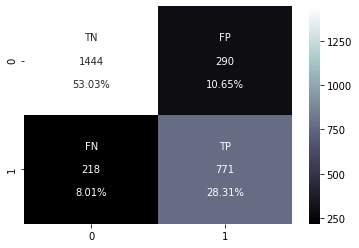

In [201]:
confusion = metrics.confusion_matrix(y_pred_final["Converted"], y_pred_final["predicted"])
print(confusion)
# plot confusion matrix

grp_name = ["TN", "FP", "FN", "TP"]
grp_counts = ["{0:0.0f}".format(val) for val in confusion.flatten()]
grp_perc = ["{0:0.2%}".format(val) for val in confusion.flatten()/np.sum(confusion)]
labels =[f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(grp_name, grp_counts, grp_perc)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt='', cmap="bone")
plt.show()


In [202]:
True_Postive = confusion[1,1]
True_Negative = confusion[0,0]
False_Positive = confusion[0,1]
False_Negative = confusion[1,0]

**Sensitivity of finalized Logistic Regression Model**

In [203]:
test_Sensitivity = True_Postive / float(True_Postive + False_Negative)
test_Sensitivity

0.7795753286147624

**Specificity of finalized Logistic Regression Model**

In [204]:
test_Specificity = True_Negative / float(True_Negative + False_Positive)
test_Specificity

0.8327566320645905

**False positive rate - predicting "converted" when the customer doesn't have "converted"**

In [205]:
test_FPVal = False_Positive / float(True_Negative + False_Positive)
test_FPVal

0.16724336793540945

**Positive Predicted value**

In [206]:
test_PosPredVal = True_Postive / float(True_Postive + False_Positive)
test_PosPredVal

0.7266729500471254

**Negative Predicted value**

In [207]:
test_NegPredVal = True_Negative / float(True_Negative + False_Negative)
test_NegPredVal

0.8688327316486161

**Precision: TP / (TP+FP)**

In [208]:
test_precision = confusion[1,1]/ (confusion[0,1] + confusion[1,1])
test_precision

0.7266729500471254

**Recall: TP / (TP+FN)**

In [209]:
test_recall = confusion[1,1]/ (confusion[1,0] + confusion[1,1])
test_recall

0.7795753286147624

**Precision Score and recall score**

In [210]:
print("Precision Score: ",precision_score(y_train_pred_final["converted"], y_train_pred_final["predicted"]))
print("Recall Score: ",recall_score(y_train_pred_final["converted"], y_train_pred_final["predicted"]))

Precision Score:  0.7301998519615099
Recall Score:  0.8066230580539656


In [211]:
test_F1_Score= 2*(test_precision * test_recall) / (test_precision + test_recall)
print(test_F1_Score)

0.7521951219512195


In [212]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_prob"], drop_intermediate = False )

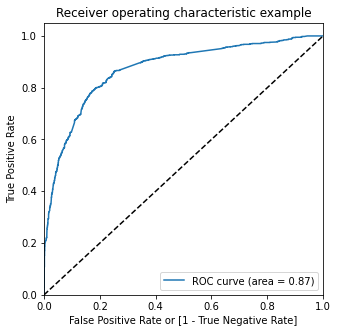

In [213]:
draw_roc(y_pred_final["Converted"], y_pred_final["Converted_prob"])

**ROC Curve on test data is good as its validated from train dataset. The area 0.87% seems to be good**

### Compute Lead Score on dataset

In [214]:
y_train_pred_final.head()

,converted,converted_prob,prospectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.194303,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.130422,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.116990,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.881057,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.570856,7987,1,1,1,1,1,1,1,0,0,0,0


In [215]:
y_pred_final.head()

,Converted,ProspectID,Converted_prob,predicted
0,0,3271,0.123142,0
1,1,1490,0.969335,1
2,0,7936,0.106094,0
3,1,4216,0.833759,1
4,0,3830,0.130714,0


In [216]:
data_train_pred = y_train_pred_final[["prospectID", "converted", "converted_prob", "predicted"]]
print(data_train_pred.shape)
data_test_pred = y_pred_final[["ProspectID", "Converted", "Converted_prob", "predicted"]]
print(data_test_pred.shape)

(6351, 4)
(2723, 4)


In [217]:
data_train_pred.rename(columns={"converted": "Converted", "converted_prob": "Converted_prob", "prospectID":"ProspectID"}, inplace=True)

In [218]:
data_pred = data_train_pred.append(data_test_pred)
print(data_pred.shape)

(9074, 4)


In [219]:
data_pred.head()

,ProspectID,Converted,Converted_prob,predicted
0,3009,0,0.194303,0
1,1012,0,0.130422,0
2,9226,0,0.116990,0
3,4750,1,0.881057,1
4,7987,1,0.570856,1


In [220]:
# Lead Score
data_pred["LeadScore"] = round(data_pred["Converted_prob"]*100)

In [221]:
data_pred.head()

,ProspectID,Converted,Converted_prob,predicted,LeadScore
0,3009,0,0.194303,0,19.0
1,1012,0,0.130422,0,13.0
2,9226,0,0.116990,0,12.0
3,4750,1,0.881057,1,88.0
4,7987,1,0.570856,1,57.0


In [222]:
#coefficients
round(res.params.sort_values(ascending=False),2)

Lead_Origin_Lead Add Form                         3.40
Last_Notable_Activity_Had a Phone Conversation    3.24
Lead_Source_Welingak Website                      2.69
Occupation_Working Professional                   2.61
Last_Notable_Activity_SMS Sent                    1.43
TimeSpentOnWebsite                                1.10
Lead_Source_Olark Chat                            0.96
const                                            -0.10
Last_Notable_Activity_Modified                   -0.70
Lead_Origin_Landing Page Submission              -1.14
Specialization_Unknown                           -1.20
Last_Notable_Activity_Olark Chat Conversation    -1.30
Do_Not_Email                                     -1.47
dtype: float64

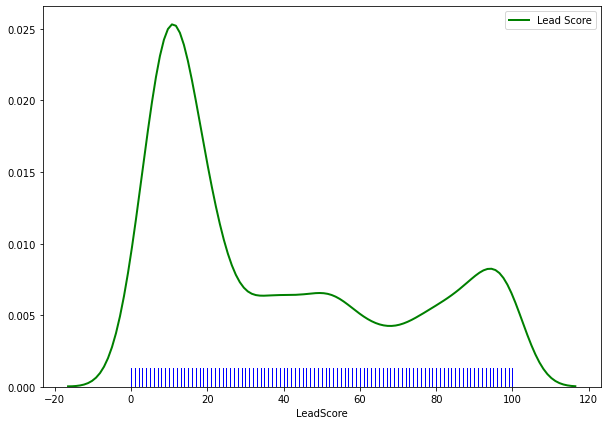

In [223]:
# PLOT THE COMPUTED LEAD SCORE FROM THE MODEL
plt.figure(figsize=[10,7])
sns.distplot(data_pred.LeadScore,hist=False, label="Lead Score",bins=40,color="Blue",rug=True,kde_kws={"color": "g", "lw": 2, "label": "KDE"})
plt.show()

In [224]:
print("Converted: ",data_pred[data_pred.LeadScore>40]["Converted"].value_counts()/len(data_pred)*100)
print("Predicted: ",data_pred[data_pred.LeadScore>40]["predicted"].value_counts()/len(data_pred)*100)

Converted:  1    29.259423
0     9.984571
Name: Converted, dtype: float64
Predicted:  1    39.243994
Name: predicted, dtype: float64


<font color="darkred">
    
### Summary

**Top Features identified in this multivariate Logistic Regression Model**<br/>

Lead_Origin_Lead Add Form                        3.39<br/>
Lead_Source_Welingak Website                     2.70<br/>
Occupation_Working Professional                  2.61<br/>
Last_Notable_Activity_SMS Sent                   1.42<br/>
TimeSpentOnWebsite                               1.10<br/>
Lead_Source_Olark Chat                           0.95<br/>
Last_Notable_Activity_Modified                  -0.71<br/>
Lead_Origin_Landing Page Submission             -1.15<br/>
Specialization_Unknown                          -1.21<br/>
Last_Notable_Activity_Olark Chat Conversation   -1.30<br/>
Do_Not_Email                                    -1.48<br/>

**Model prediction on Test-data**
Accuracy= 0.813, Sensitivity= 0.779, Specificity= 0.832, False Positive Value= 0.16, Negative Prediction Value= 0.86, Positive Prediction Value= 0.72, Precision= 0.72, Recall= 0.77, F1-Score= 0.75, Roc Curve Area = 0.87.

**Prediction On Train-data**
Accuracy= 0.810, Sensitivity= 0.806, Specificity= 0.813,
False Positive Value= 0.18, Negative Prediction Value=  0.87, Positive Prediction Value=  0.73, Precision=  0.73, Recall=  0.80, F1-Score=  0.767, Threshold cut-off=0.4, ROC Curve Area=0.88

Its a very good model predicted through this process.